# Useful libraries

In [145]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date, timedelta

matplotlib.rcParams["figure.facecolor"] = "white"
pd.set_option("display.max_columns", None)


# EDA

## Data Overview

In [146]:
# create a dataframe from the csv file Time_Value_CM.csv
df = pd.read_csv("../power_data/Time_Value_CM.csv", names=["Date", "Value"])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


In [147]:
# convert the date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by="Date", inplace=True)

In [148]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_of_week"] = df["Date"].dt.dayofweek.astype(int)
df["Hour"] = df["Date"].dt.hour
df["Minute"] = df["Date"].dt.minute
df["Second"] = df["Date"].dt.second

In [149]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0


In [150]:
# drop second
df.drop(["Second"], axis=1, inplace=True)

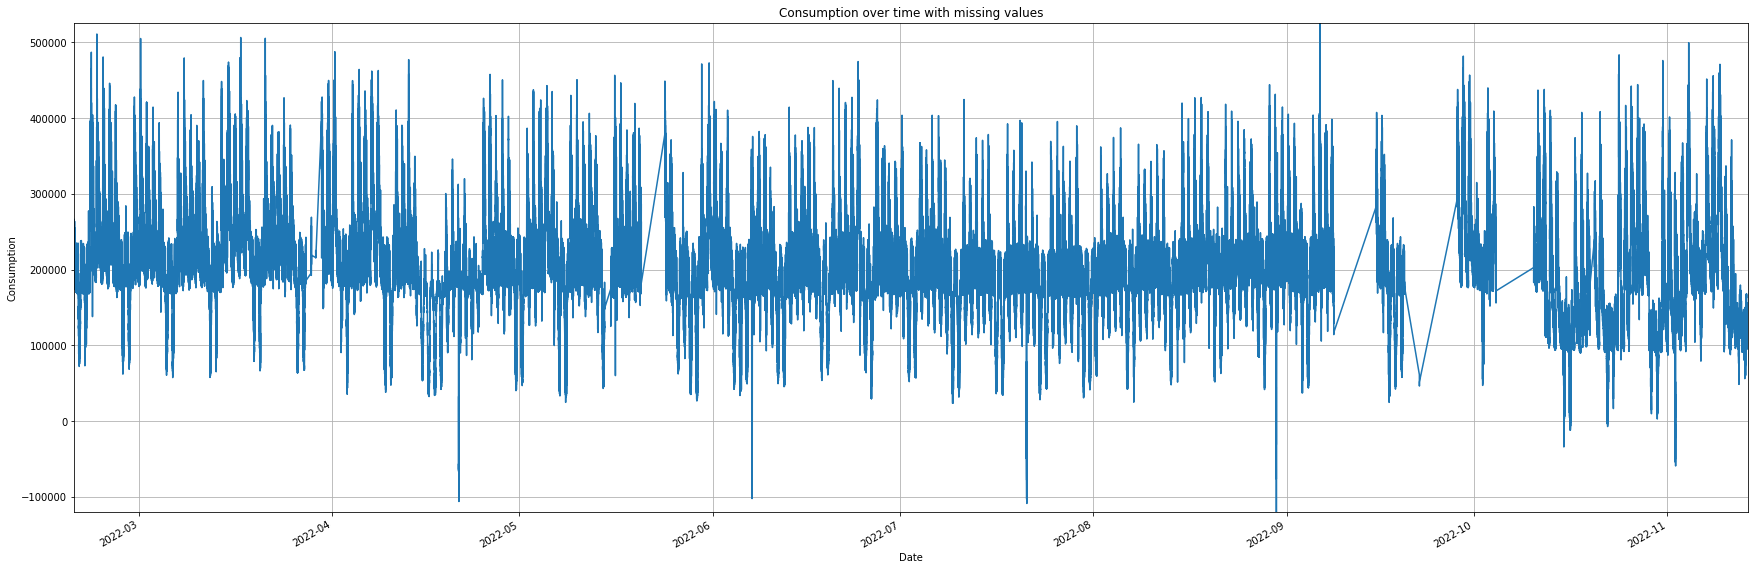

In [151]:
def plot_consumption_over_time_detailed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"])
    ax.set_title("Consumption over time with missing values")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_over_time_missing_values.png')

plot_consumption_over_time_detailed_graph()


## Replacing missing data

### Days Missing

In [152]:
sdate = date(2022, 2, 19)
edate = date(2022, 11, 13)
all_days = pd.date_range(sdate, edate - timedelta(days=1), freq="d")
all_days = pd.to_datetime(all_days, format="%Y-%m-%d")

In [153]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0:
        days_missing.append(x)

In [154]:
missing_perc = round((len(days_missing) * 100) / len(all_days), 2)
print("We have ", missing_perc, "% of complete days missing values.")

We have  7.87 % of complete days missing values.


In [155]:
for miss_day in days_missing:
    prev_week = miss_day - dt.timedelta(days=7)
    next_week = miss_day + dt.timedelta(days=7)
    prev_2_week = miss_day - dt.timedelta(days=14)
    next_2_week = miss_day + dt.timedelta(days=14)
    if df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)].shape[0] != 0:
        df_concat = df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=7)
        df = pd.concat([df, df_concat], ignore_index=True)
    else:
        if (
            df.loc[(df.Month == next_week.month) & (df.Day == next_week.day)].shape[0]
            != 0
        ):
            df_concat = df.loc[
                (df.Month == next_week.month) & (df.Day == next_week.day)
            ]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(days=7)
            df = pd.concat([df, df_concat], ignore_index=True)
        else:
            if (
                df.loc[
                    (df.Month == prev_2_week.month) & (df.Day == prev_2_week.day)
                ].shape[0]
                != 0
            ):
                df_concat = df.loc[
                    (df.Month == prev_2_week.month) & (df.Day == prev_2_week.day)
                ]
                df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=14)
                df = pd.concat([df, df_concat], ignore_index=True)
            else:
                if (
                    df.loc[
                        (df.Month == next_2_week.month) & (df.Day == next_2_week.day)
                    ].shape[0]
                    != 0
                ):
                    df_concat = df.loc[
                        (df.Month == next_2_week.month) & (df.Day == next_2_week.day)
                    ]
                    df_concat["Date"] = df_concat["Date"] - dt.timedelta(days=14)
                    df = pd.concat([df, df_concat], ignore_index=True)

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_1652\2076673288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=7)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_1652\2076673288.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days=14)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_1652\2076673288.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [156]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_of_week"] = df["Date"].dt.dayofweek.astype(int)
df["Hour"] = df["Date"].dt.hour
df["Minute"] = df["Date"].dt.minute
df["Second"] = df["Date"].dt.second

In [157]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0:
        days_missing.append(x)

In [158]:
missing_perc = round((len(days_missing) * 100) / len(all_days), 2)
print("We now have", missing_perc, "% of complete days missing values.")

We now have 0.0 % of complete days missing values.


In [159]:
# sort
df.sort_values(by="Date", inplace=True)

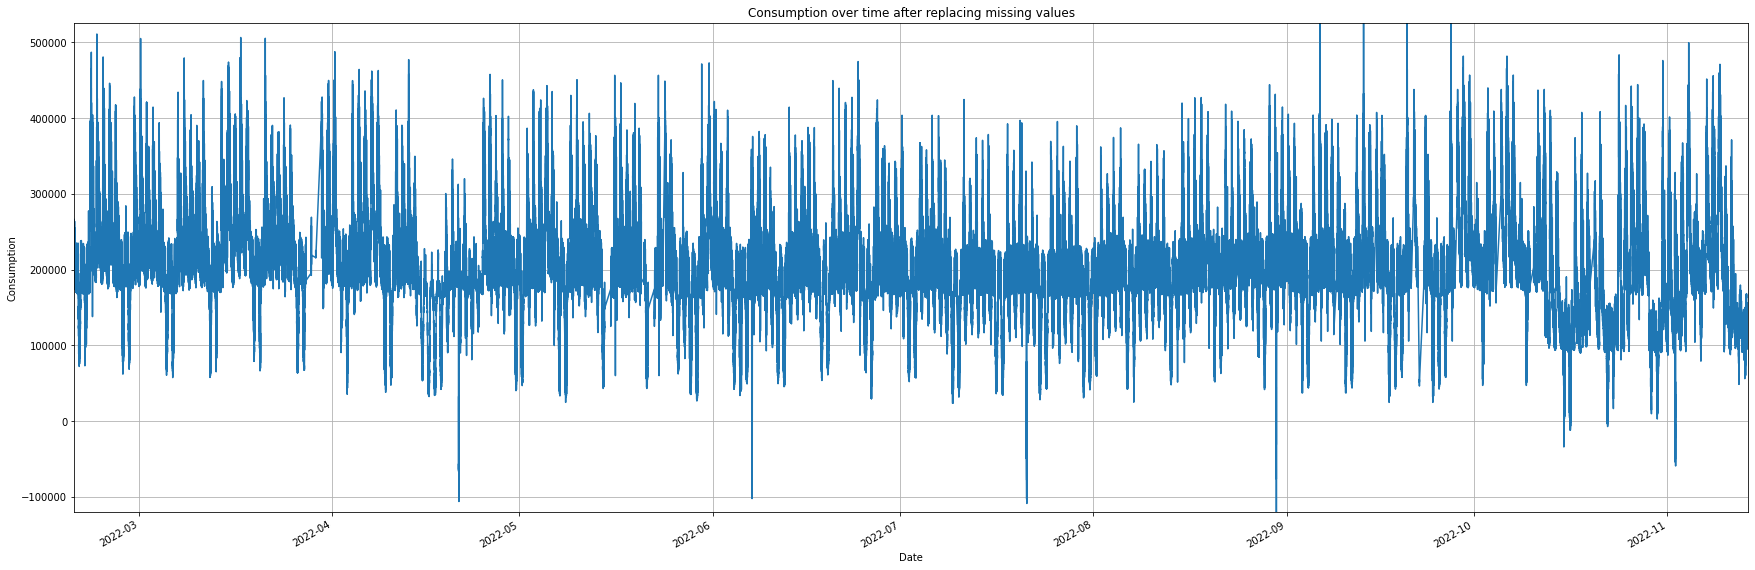

In [160]:
def plot_consumption_over_time_detailed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"])
    ax.set_title("Consumption over time after replacing missing values")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_over_time_replaced_values.png')

plot_consumption_over_time_detailed_graph()

### Hours Missing

In [161]:
hours = range(0, 23)

In [162]:
hours_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    for hour in hours:
        if (
            df.loc[(df.Month == month_x) & (df.Day == day_x) & (df.Hour == hour)].shape[
                0
            ]
            == 0
        ):
            hours_missing.append([x, hour])

In [163]:
missing_perc = round((len(hours_missing) * 100) / (len(all_days) * 24), 2)
print("We have", missing_perc, "% of complete hours missing values.")

We have 3.36 % of complete hours missing values.


In [164]:
for miss_value in hours_missing:
    prev_hour = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=-1)
    )
    next_hour = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=1)
    )
    prev2_hours = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=-2)
    )
    next2_hours = (
        miss_value[0] + dt.timedelta(hours=miss_value[1]) + dt.timedelta(hours=2)
    )
    if (
        df.loc[
            (df.Month == prev_hour.month)
            & (df.Day == prev_hour.day)
            & (df.Hour == prev_hour.hour)
        ].shape[0]
        != 0
    ):
        df_concat = df.loc[
            (df.Month == prev_hour.month)
            & (df.Day == prev_hour.day)
            & (df.Hour == prev_hour.hour)
        ]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=1)
        df = pd.concat([df, df_concat], ignore_index=True)
    else:
        if (
            df.loc[
                (df.Month == next_hour.month)
                & (df.Day == next_hour.day)
                & (df.Hour == next_hour.hour)
            ].shape[0]
            != 0
        ):
            df_concat = df.loc[
                (df.Month == next_hour.month)
                & (df.Day == next_hour.day)
                & (df.Hour == next_hour.hour)
            ]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(hours=1)
            df = pd.concat([df, df_concat], ignore_index=True)
        else:
            if (
                df.loc[
                    (df.Month == prev2_hours.month)
                    & (df.Day == prev2_hours.day)
                    & (df.Hour == prev2_hours.hour)
                ].shape[0]
                != 0
            ):
                df_concat = df.loc[
                    (df.Month == prev2_hours.month)
                    & (df.Day == prev2_hours.day)
                    & (df.Hour == prev2_hours.hour)
                ]
                df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=2)
                df = pd.concat([df, df_concat], ignore_index=True)
            else:
                if (
                    df.loc[
                        (df.Month == next2_hours.month)
                        & (df.Day == next2_hours.day)
                        & (df.Hour == next2_hours.hour)
                    ].shape[0]
                    != 0
                ):
                    df_concat = df.loc[
                        (df.Month == next2_hours.month)
                        & (df.Day == next2_hours.day)
                        & (df.Hour == next2_hours.hour)
                    ]
                    df_concat["Date"] = df_concat["Date"] - dt.timedelta(hours=2)
                    df = pd.concat([df, df_concat], ignore_index=True)

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_1652\2228839208.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=1)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_1652\2228839208.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(hours=2)
C:\Users\Kelyan\AppData\Local\Temp\ipykernel_1652\2228839208.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [165]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_of_week"] = df["Date"].dt.dayofweek.astype(int)
df["Hour"] = df["Date"].dt.hour
df["Minute"] = df["Date"].dt.minute
df["Second"] = df["Date"].dt.second

In [166]:
hours_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    for hour in hours:
        if (
            df.loc[(df.Month == month_x) & (df.Day == day_x) & (df.Hour == hour)].shape[
                0
            ]
            == 0
        ):
            hours_missing.append([x, hour])

In [167]:
missing_perc = round((len(hours_missing) * 100) / (len(all_days) * 24), 2)
print("We now have", missing_perc, "% of complete hours missing values.")

We now have 1.89 % of complete hours missing values.


In [168]:
df.sort_values(by="Date", inplace=True)

## Adding Irradiance Data

In [169]:
df_irr = pd.read_csv("../meteo_data/radiation_data.csv", sep=";")
df_irr = df_irr.drop(df_irr.columns[0], axis=1)
df_irr["Date"] = pd.to_datetime(df_irr["Date"], format="%Y%m%d%H%M")
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0
1,2022-01-01 00:10:00,0
2,2022-01-01 00:20:00,0
3,2022-01-01 00:30:00,0
4,2022-01-01 00:40:00,0


In [170]:
df_nan = df_irr[df_irr["Irradiance"] == "-"]
df_nan = df_nan.replace("-", np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_irr.loc[df_nan_index, "Irradiance"] = np.nan

In [171]:
df_irr.head()

# add between each data the missing values for the minute
df_irr = df_irr.set_index("Date")
df_irr = df_irr.resample("1min").asfreq()
df_irr = df_irr.reset_index()

# convert Irradiance to float
df_irr["Irradiance"] = df_irr["Irradiance"].str.replace(",", ".").astype(float)
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0.0
1,2022-01-01 00:01:00,NaN
2,2022-01-01 00:02:00,NaN
3,2022-01-01 00:03:00,NaN
4,2022-01-01 00:04:00,NaN


In [172]:
# for the nan values we will use the first value before the nan value that is not nan
df_irr["Irradiance"] = df_irr["Irradiance"].fillna(method="ffill")

In [173]:
df_irr = df_irr[
    (df_irr["Date"] >= df["Date"].min()) & (df_irr["Date"] <= df["Date"].max())
]

In [174]:
df = pd.merge(df, df_irr, on="Date")

In [175]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0


## Add Temperature Data

In [176]:
df_temp = pd.read_csv(
    "../meteo_data/temperature_data.csv", sep=";", names=["Station", "Date", "Temperature"]
)

In [177]:
df_temp = df_temp.drop(df.index[0])
df_temp = df_temp.drop(["Station"], axis=1)
df_temp["Date"] = pd.to_datetime(df_temp["Date"], format="%Y%m%d%H%M")
df_temp.head()

,Date,Temperature
1,2022-01-01 00:00:00,8.6
2,2022-01-01 00:10:00,8.7
3,2022-01-01 00:20:00,8.7
4,2022-01-01 00:30:00,8.9
5,2022-01-01 00:40:00,8.6


In [178]:
df_nan = df_temp[df_temp["Temperature"] == "-"]
df_nan = df_nan.replace("-", np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_temp.loc[df_nan_index, "Temperature"] = np.nan

In [179]:
df_temp.head()
df_temp["Temperature"] = df_temp["Temperature"].astype(float)

# add between each data the missing values for the minute
df_temp = df_temp.set_index("Date")
df_temp = df_temp.resample("1min").asfreq()
df_temp = df_temp.reset_index()
df_temp["Temperature"] = df_temp["Temperature"].fillna(method="ffill")
df_temp = df_temp[
    (df_temp["Date"] >= df["Date"].min()) & (df_temp["Date"] <= df["Date"].max())
]

In [180]:
df = pd.merge(df, df_temp, on="Date")

In [181]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0,12.8
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0,12.8
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0,12.8
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0,12.8
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0,12.8


# Feature Engineering

## Weekend vs Weekdays

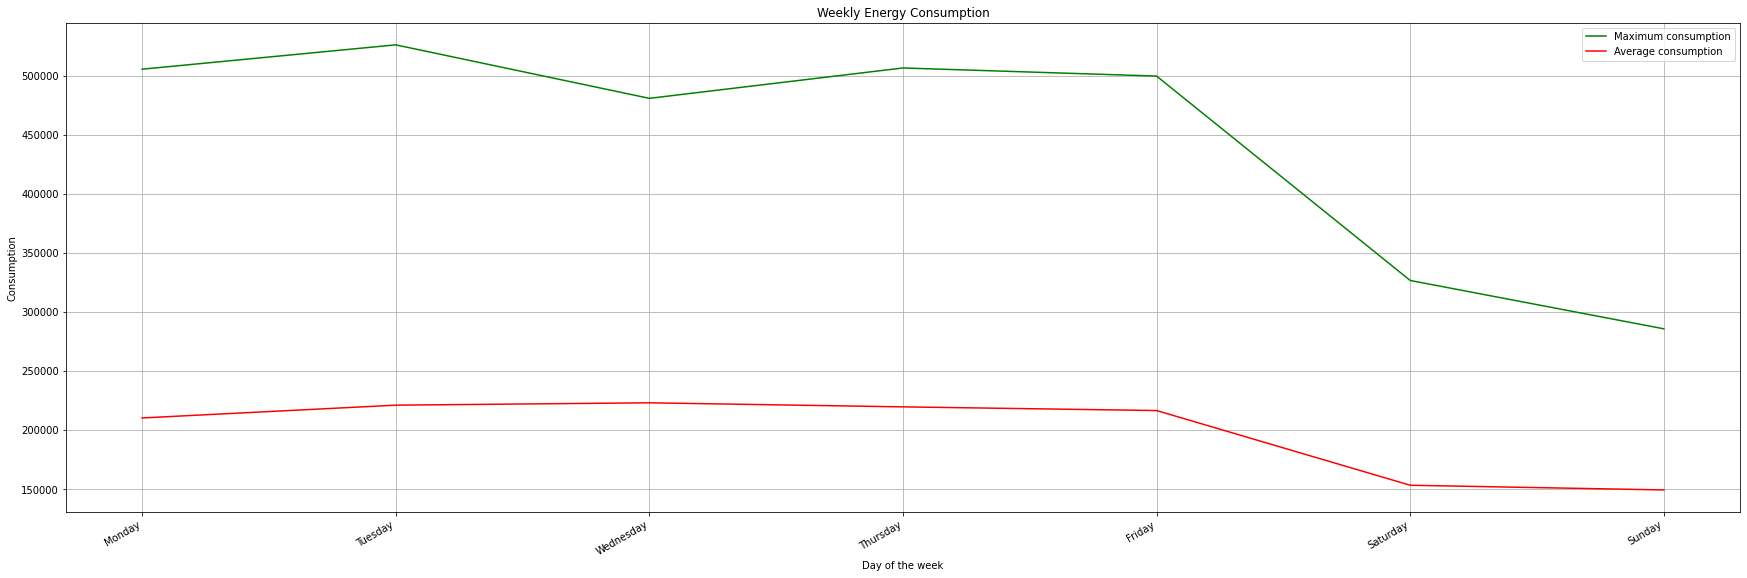

In [182]:
# function to plot the first week
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(
        df["Value"].groupby(df["Day_of_week"]).max().index,
        df["Value"].groupby(df["Day_of_week"]).max().values,
        color="g",
        label="Maximum consumption",
    )
    ax.plot(
        df["Value"].groupby(df["Day_of_week"]).mean().index,
        df["Value"].groupby(df["Day_of_week"]).mean().values,
        color="r",
        label="Average consumption",
    )
    ax.set_title("Weekly Energy Consumption")
    ax.set_xlabel("Day of the week")
    ax.set_ylabel("Consumption")
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks(
        [0, 1, 2, 3, 4, 5, 6],
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    )
    fig.savefig('../output/plot_weekly_consumption.png')
    plt.show()

plot_weekly_consumption()


In [183]:
# add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df["Weekend"] = df["Date"].dt.dayofweek.isin([5, 6]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature,Weekend
395953,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,0,96.0,11.3,1
395954,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,0,96.0,11.3,1
395955,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,0,96.0,11.3,1
395956,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,0,96.0,11.3,1
395957,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,0,96.0,11.3,0


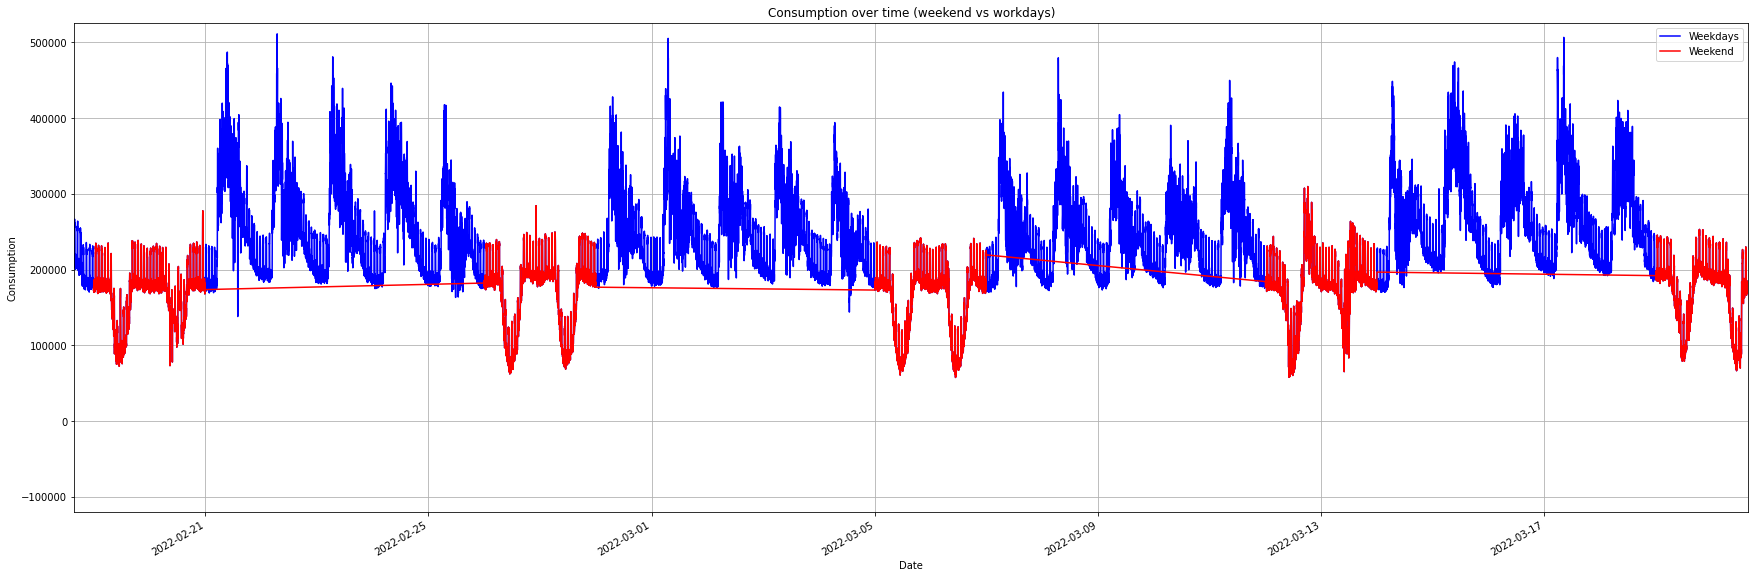

In [184]:
# function to plot the value with another color for the weekend days
def plot_consumption_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"], color="blue", label="Weekdays")
    ax.plot(
        df[df["Weekend"] == 1]["Date"],
        df[df["Weekend"] == 1]["Value"],
        color="red",
        label="Weekend",
    )
    ax.set_title("Consumption over time (weekend vs workdays)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].min() + pd.Timedelta(days=30))
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
    fig.savefig('../output/plot_consumption_weekend_vs_workdays.png')



plot_consumption_over_time_weekend()


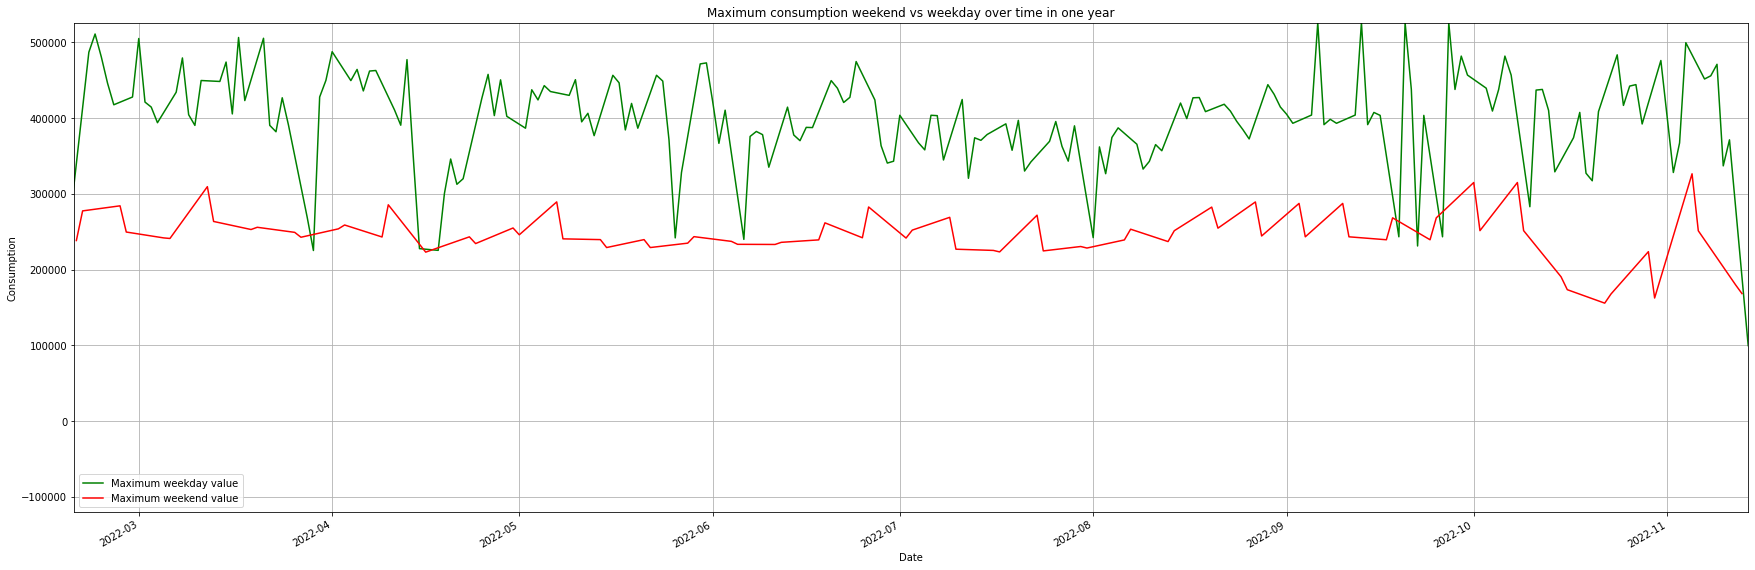

In [185]:
def plot_consumption_over_time_weekend_vs_weekday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(
        df[df["Weekend"] == 0].groupby(df["Date"].dt.date)["Value"].max(),
        color="green",
        label="Maximum weekday value",
    )
    ax.plot(
        df[df["Weekend"] == 1].groupby(df["Date"].dt.date)["Value"].max(),
        color="red",
        label="Maximum weekend value",
    )
    ax.set_title("Maximum consumption weekend vs weekday over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_weekend_vs_workdays_maximum.png')


plot_consumption_over_time_weekend_vs_weekday()


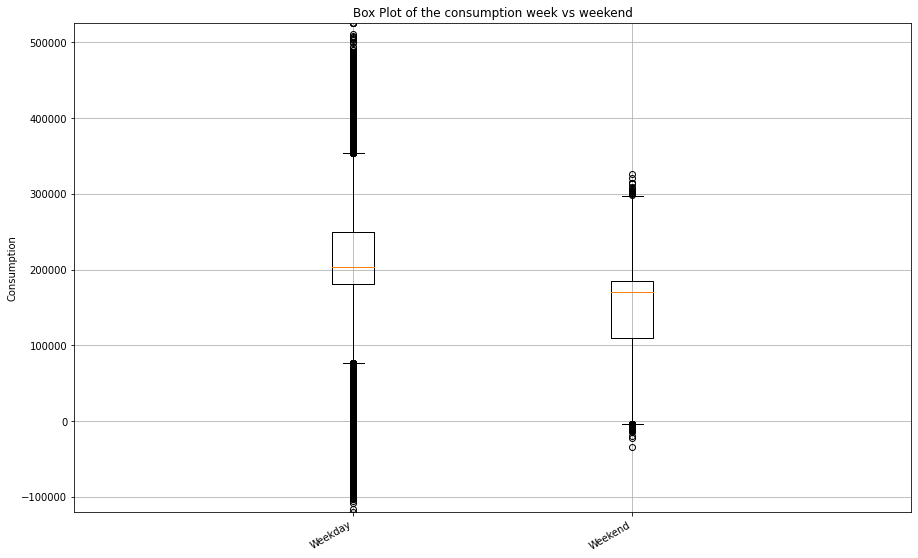

In [186]:
def plot_consumption_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df["Weekend"] == 0]["Value"], df[df["Weekend"] == 1]["Value"]])
    ax.set_title("Box Plot of the consumption week vs weekend")
    ax.set_ylabel("Consumption")
    ax.set_xlim(0, 3)
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    plt.xticks([1, 2], ["Weekday", "Weekend"])
    fig.autofmt_xdate()
    fig.savefig('../output/plot_consumption_weekend_vs_workdays_boxplot.png')
    plt.show()

plot_consumption_over_time_weekend_boxplot()


## Winter vs Summer

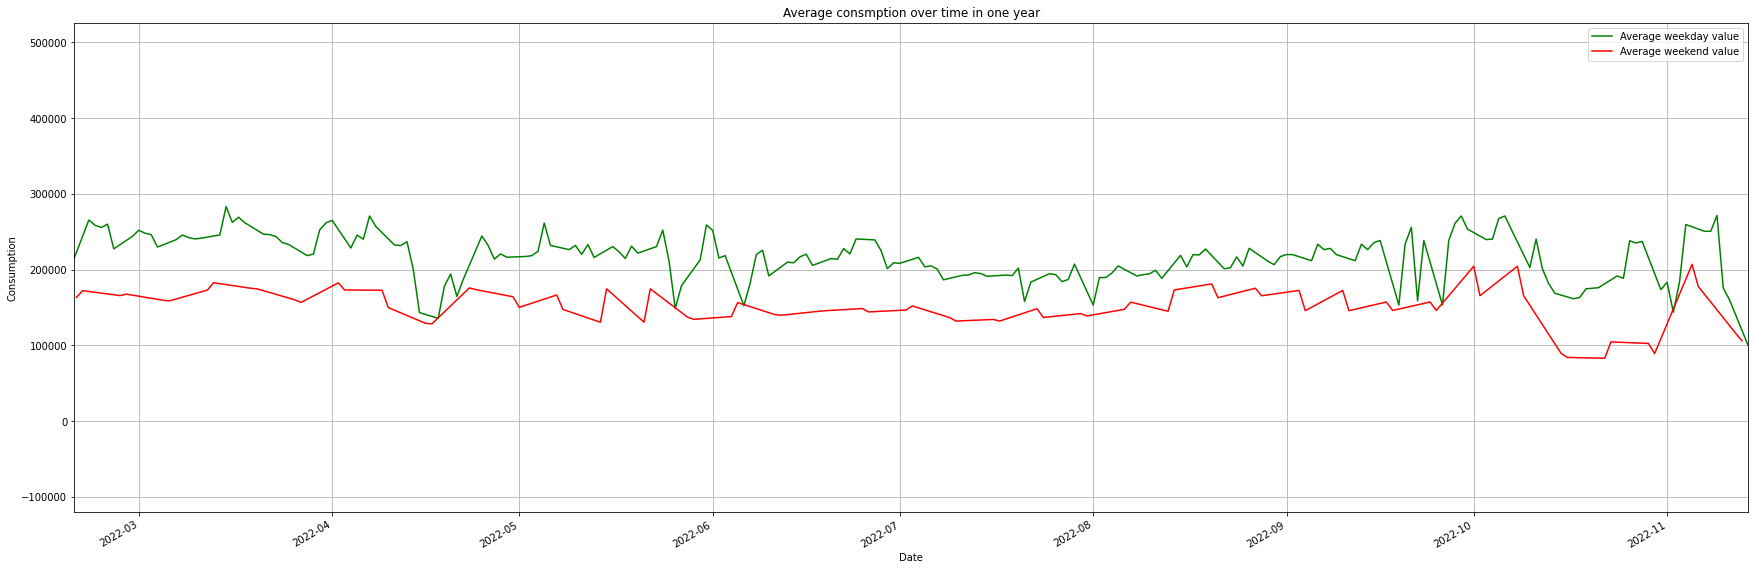

In [187]:
def plot_consumption_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(
        df[df["Weekend"] == 0].groupby(df["Date"].dt.date)["Value"].mean(),
        color="green",
        label="Average weekday value",
    )
    ax.plot(
        df[df["Weekend"] == 1].groupby(df["Date"].dt.date)["Value"].mean(),
        color="red",
        label="Average weekend value",
    )
    ax.set_title("Average consmption over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_one_year.png')

plot_consumption_over_time_winter_peak()


In [188]:
# winter 1 and summer 0
df["Winter"] = df["Date"].dt.month.isin([11, 12, 1, 2, 3]).astype(int)
df.tail()
df.sort_values(by="Date", inplace=True)

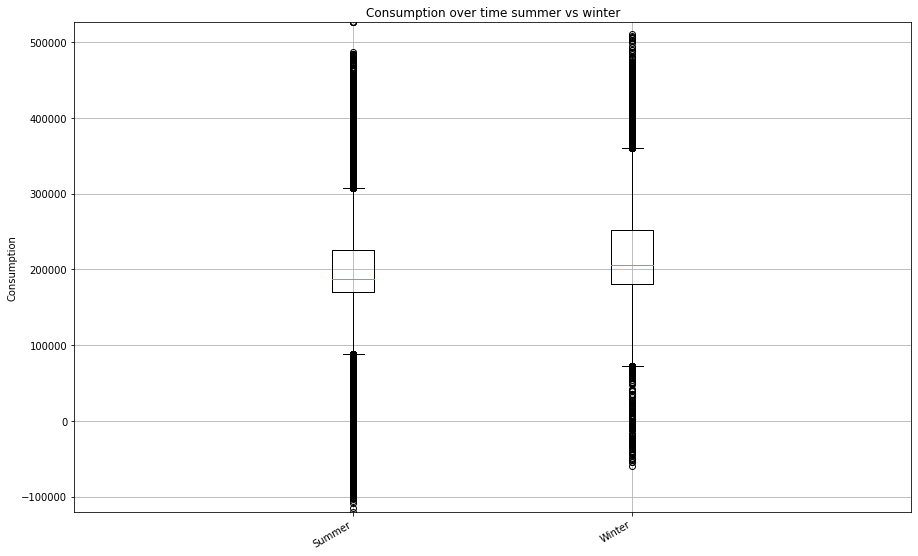

In [189]:
def plot_consumption_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df["Winter"] == 0]["Value"], df[df["Winter"] == 1]["Value"]])
    ax.set_title("Consumption over time summer vs winter")
    ax.set_ylabel("Consumption")
    ax.set_xlim(0, 3)
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    plt.xticks([1, 2], ["Summer", "Winter"])
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_winter_vs_summer_boxplot.png')

plot_consumption_over_time_winter_boxplot()

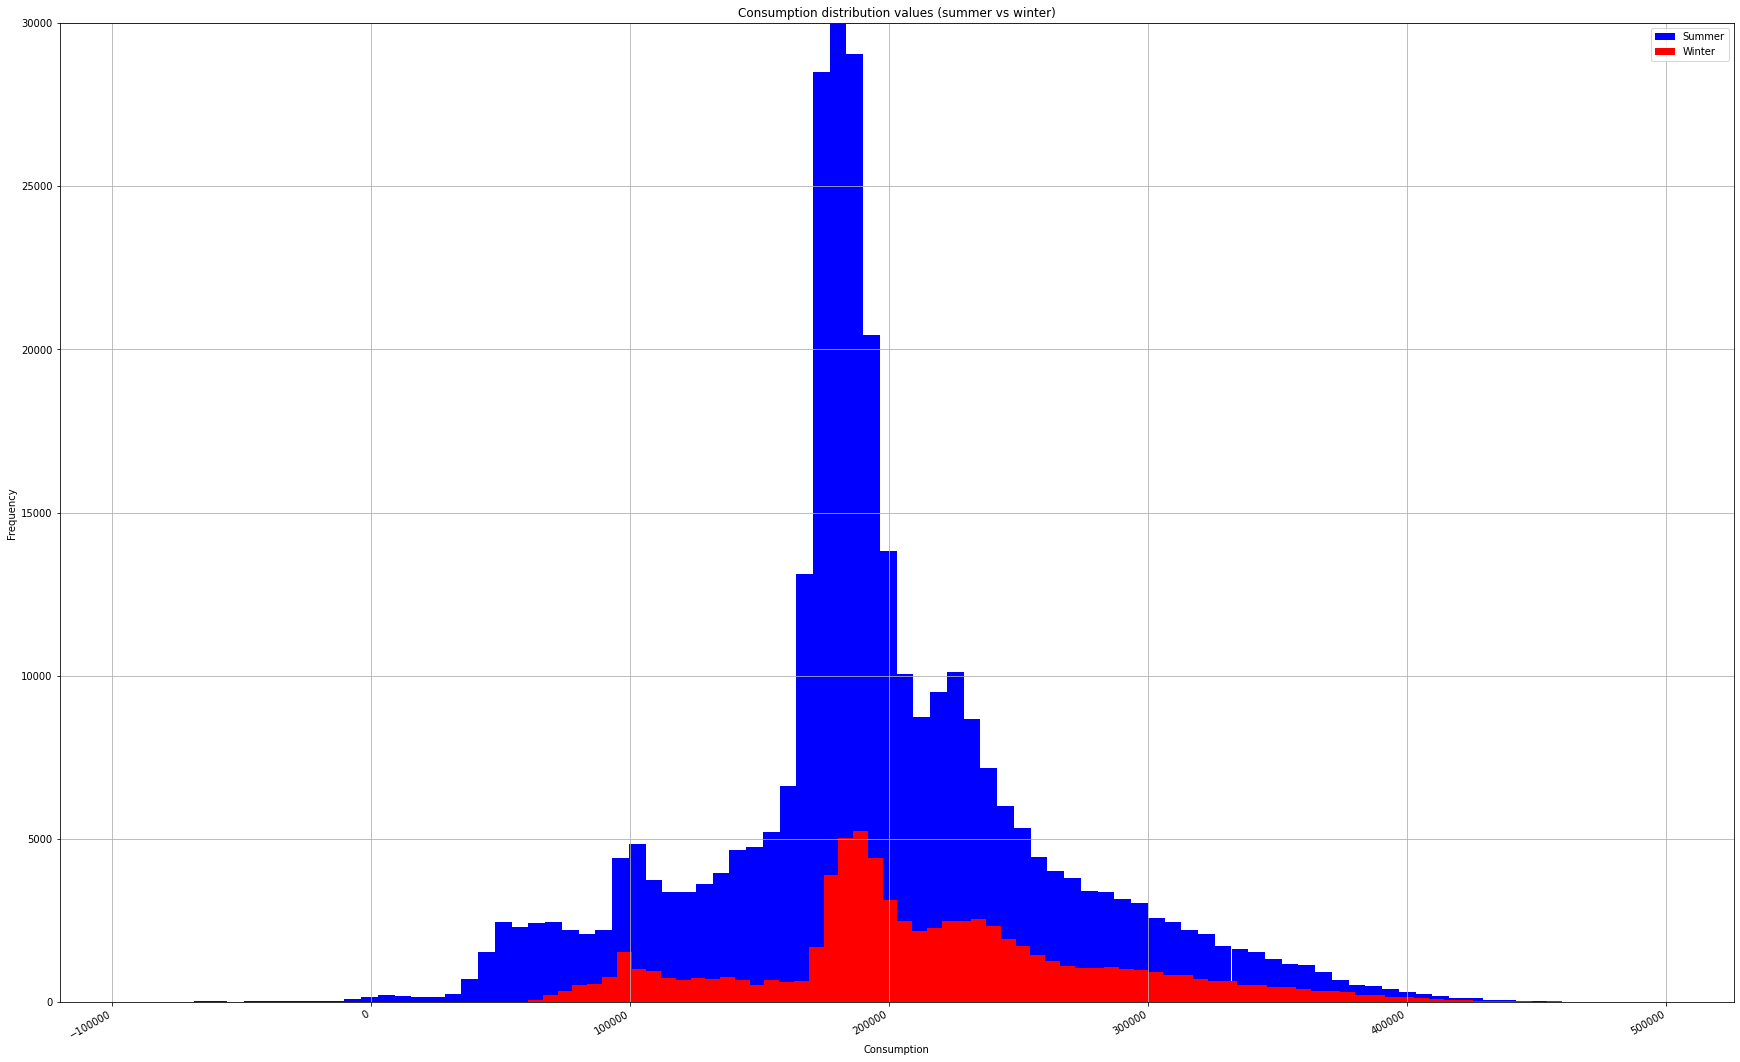

In [190]:
def plot_consumption_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df["Winter"] == 0]["Value"], bins=100, color="blue", label="Summer")
    ax.hist(df[df["Winter"] == 1]["Value"], bins=100, color="red", label="Winter")
    ax.set_title("Consumption distribution values (summer vs winter)")
    ax.set_xlabel("Consumption")
    ax.set_ylabel("Frequency")
    ax.set_xlim(df["Value"].min(), df["Value"].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_winter_vs_summer_distribution.png')
plot_consumption_over_time_winter_distribution()

## Working hours vs Free hours vs Transition morning vs Transition evening

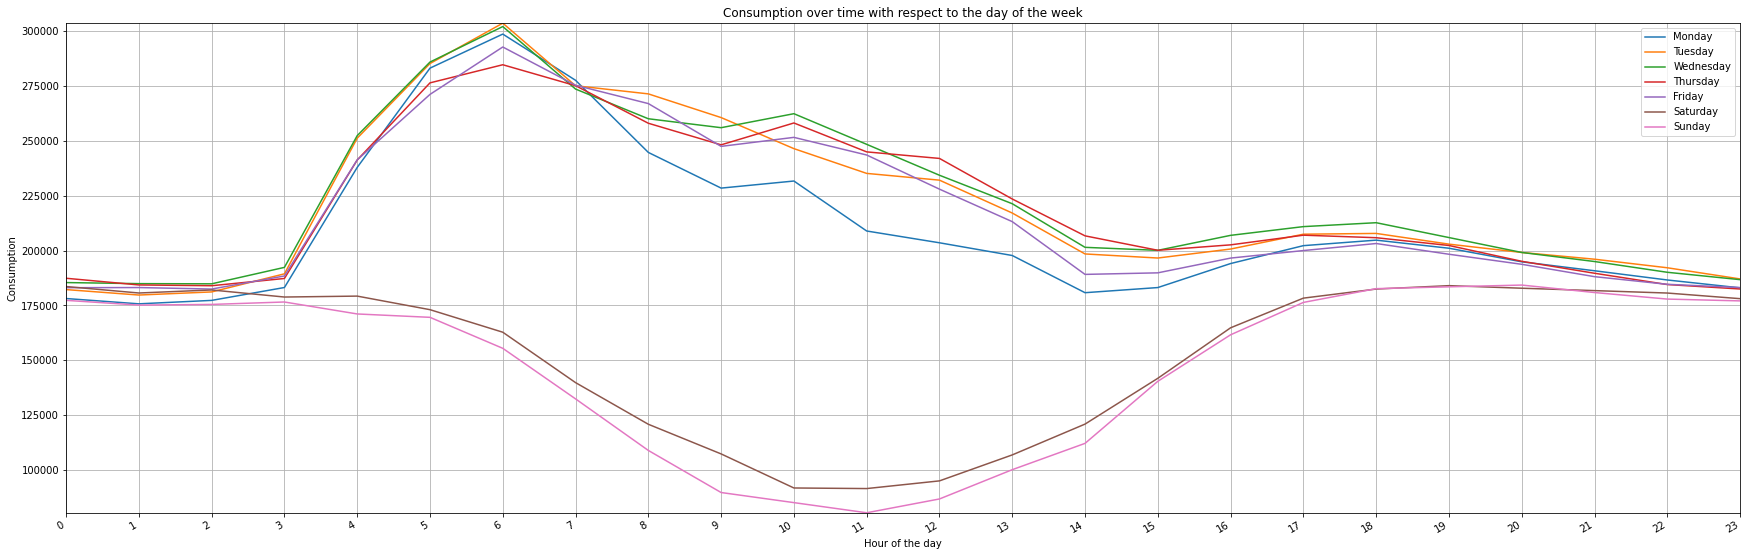

In [191]:
fig, ax = plt.subplots(figsize=(30, 10))

df["Day of the week"] = df["Date"].dt.dayofweek
df["Hour of the day"] = df["Date"].dt.hour

df_grouped = df.groupby(["Day of the week", "Hour of the day"])["Value"].mean()
df_grouped = df_grouped.reset_index()

for day in range(7):
    ax.plot(
        df_grouped[df_grouped["Day of the week"] == day]["Hour of the day"],
        df_grouped[df_grouped["Day of the week"] == day]["Value"],
        label=day,
    )

ax.set_title("Consumption over time with respect to the day of the week")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Consumption")
ax.set_xlim(df_grouped["Hour of the day"].min(), df_grouped["Hour of the day"].max())
ax.set_ylim(df_grouped["Value"].min(), df_grouped["Value"].max())
ax.set_xticks(range(24))

ax.grid(True)

import calendar

ax.legend([calendar.day_name[day] for day in range(7)])
fig.autofmt_xdate()
plt.show()
fig.savefig('../output/plot_consumption_day_of_the_week.png')

In [192]:
df["Working hour"] = ((df["Date"].dt.hour >= 6) & (df["Date"].dt.hour < 15)).astype(int)
df["Transition morning"] = (
    (df["Date"].dt.hour >= 3) & (df["Date"].dt.hour < 6)
).astype(int)
df["Transition evening"] = (
    (df["Date"].dt.hour >= 15) & (df["Date"].dt.hour < 19)
).astype(int)

# Make a column that can take 4 values, 0 if the hour is between 3 and 6, 1 if the hour is between 6 and 15, 2 if the hour is between 15 and 19, 3 otherwise
df["Type of hour"] = df["Date"].dt.hour.apply(
    lambda x: 0
    if (x >= 3) & (x < 6)
    else 1
    if (x >= 6) & (x < 15)
    else 2
    if (x >= 15) & (x < 19)
    else 3
)

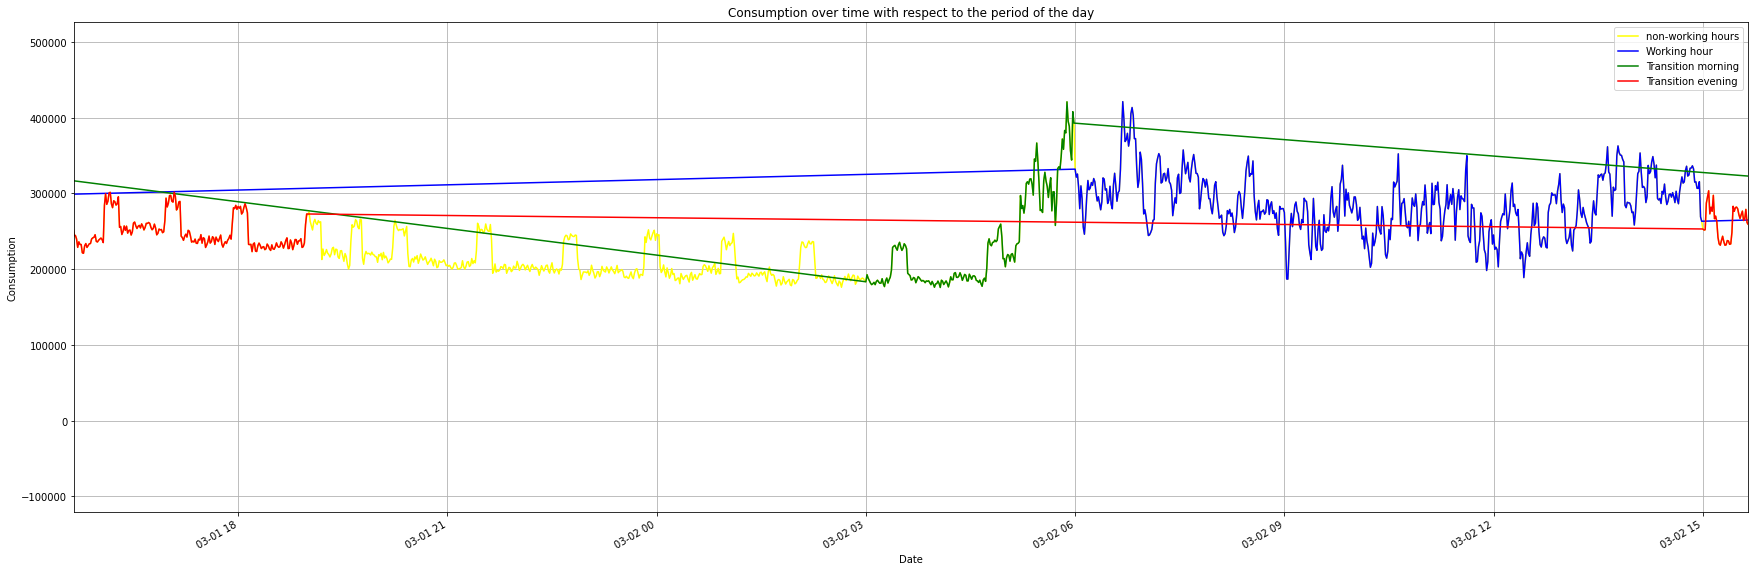

In [193]:
# plot the consumption over time
def plot_day(x):
    fig, ax = plt.subplots(figsize=(30, 10))
    # use a different color for the working hour, transition morning and transition evening
    ax.plot(df["Date"], df["Value"], color="yellow", label="non-working hours")
    ax.plot(
        df[df["Working hour"] == 1]["Date"],
        df[df["Working hour"] == 1]["Value"],
        color="blue",
        label="Working hour",
    )
    ax.plot(
        df[df["Transition morning"] == 1]["Date"],
        df[df["Transition morning"] == 1]["Value"],
        color="green",
        label="Transition morning",
    )
    ax.plot(
        df[df["Transition evening"] == 1]["Date"],
        df[df["Transition evening"] == 1]["Value"],
        color="red",
        label="Transition evening",
    )

    ax.set_title("Consumption over time with respect to the period of the day")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(
        df["Date"].min() + pd.DateOffset(days=x),
        df["Date"].min() + pd.DateOffset(days=x + 1),
    )
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()
    fig.savefig(f"../output/plot_consumption_period_of_the_day.png")

plot_day(11)

## Holiday Feature

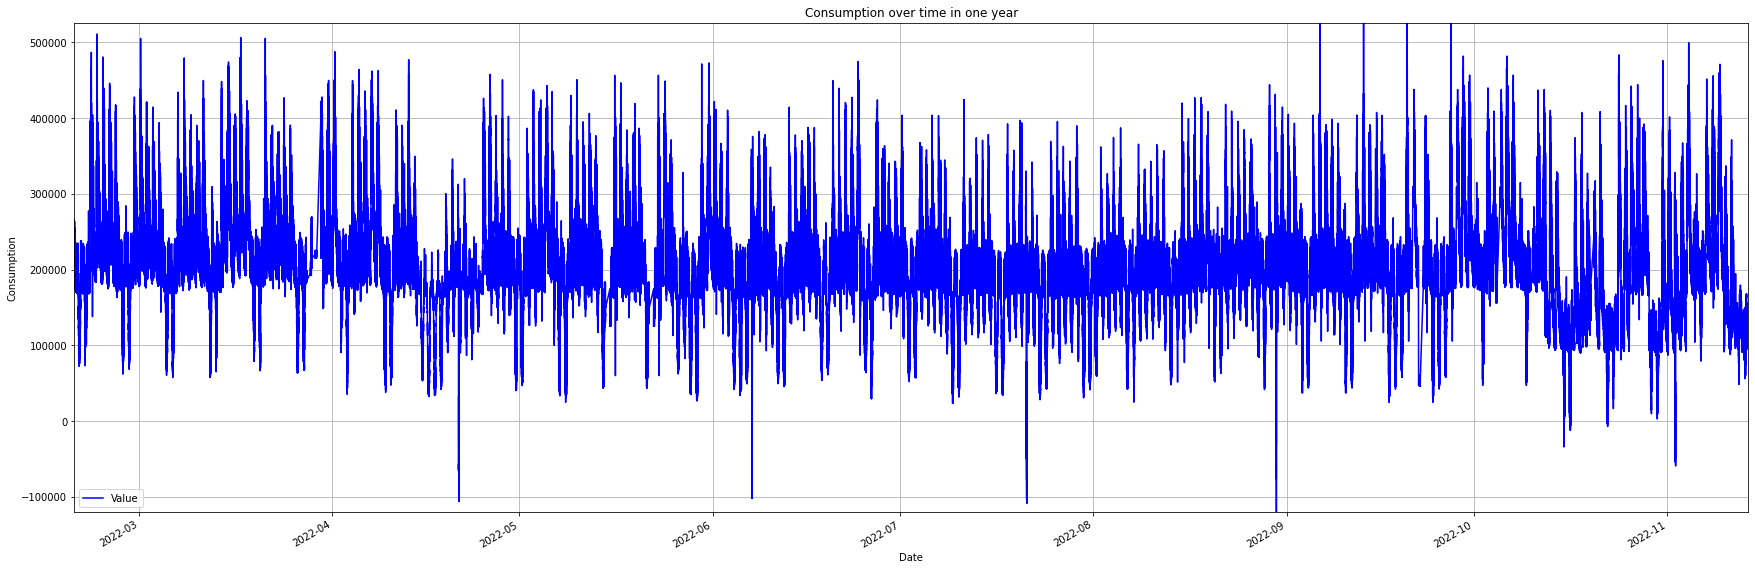

In [194]:
# plot value over time
def plot_consumption_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"], color="blue", label="Value")
    ax.set_title("Consumption over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_over_time.png')

plot_consumption_over_time()

In [195]:
# add a column holiday 1 between 2022-04-20 and 2022-04-28  and specific date 1/08/2022  0 otherwise
df["Holiday"] = (
    ((df["Date"] >= "2022-04-15") & (df["Date"] <= "2022-04-25"))
    | ((df["Date"] >= "2022-08-01") & (df["Date"] <= "2022-08-01"))
    | ((df["Date"] >= "2022-09-20") & (df["Date"] <= "2022-09-20"))
    | ((df["Date"] >= "2022-12-24") & (df["Date"] <= "2022-09-25"))
).astype(int)

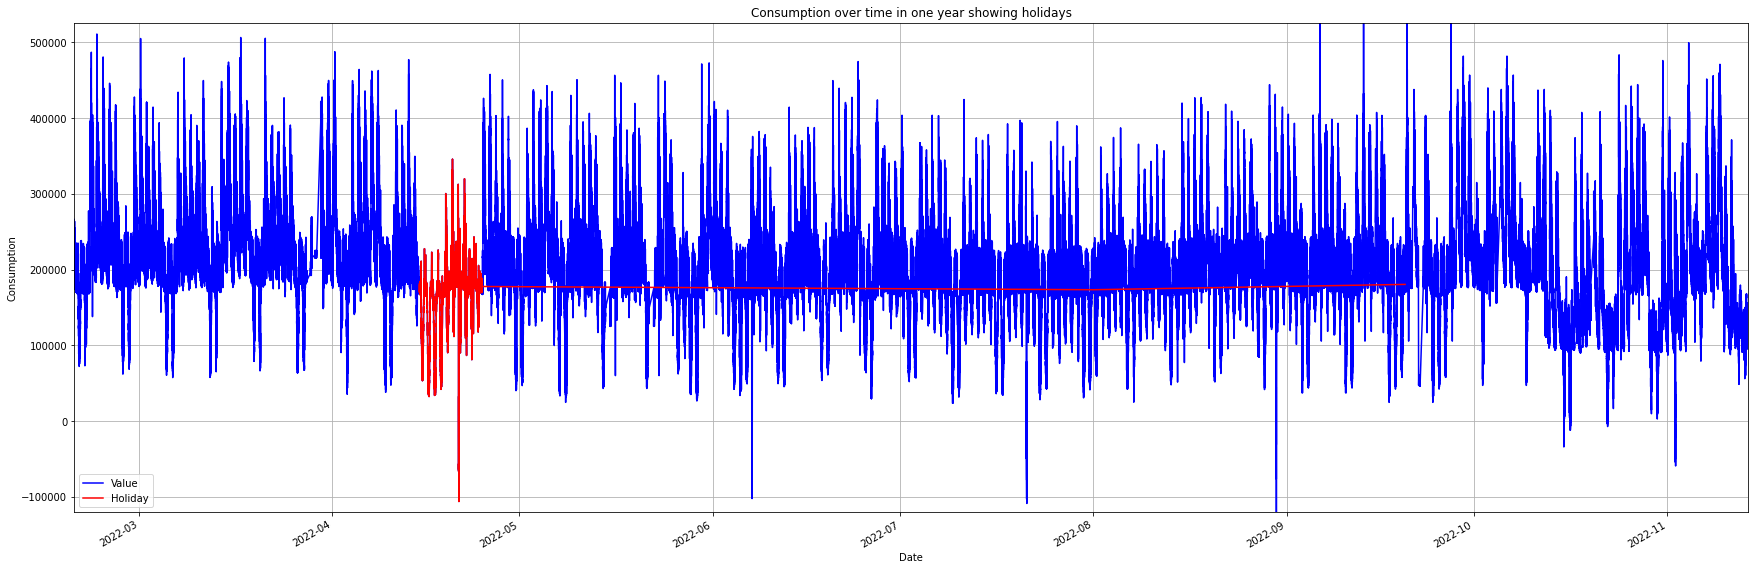

In [196]:
# plot value over time with holidays in anotehr color
def plot_consumption_over_time_holiday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Date"], df["Value"], color="blue", label="Value")
    ax.plot(
        df[df["Holiday"] == 1]["Date"],
        df[df["Holiday"] == 1]["Value"],
        color="red",
        label="Holiday",
    )
    ax.set_title("Consumption over time in one year showing holidays")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(df["Date"].min(), df["Date"].max())
    ax.set_ylim(df["Value"].min(), df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_over_time_holiday.png')

plot_consumption_over_time_holiday()


## Normalized feature for Value

In [197]:
# add a column with the normalized value
df["Normalized"] = (df["Value"] - df["Value"].min()) / (
    df["Value"].max() - df["Value"].min()
)

In [198]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Irradiance,Temperature,Weekend,Winter,Day of the week,Hour of the day,Working hour,Transition morning,Transition evening,Type of hour,Holiday,Normalized
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.514366
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.521853
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.526065
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.523435
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,134.0,12.8,0,1,4,15,0,0,1,2,0,0.525545


## Pattern


In [199]:
df["Peak"] = 0
# if normalized value is greater than 0.3 but smaller than 1, it is a peak but for non working hours
df.loc[
    (df["Normalized"] > 0.52)
    & (df["Normalized"] < 0.60)
    & (df["Working hour"] == 0)
    & (df["Transition evening"] == 0),
    "Peak",
] = 1


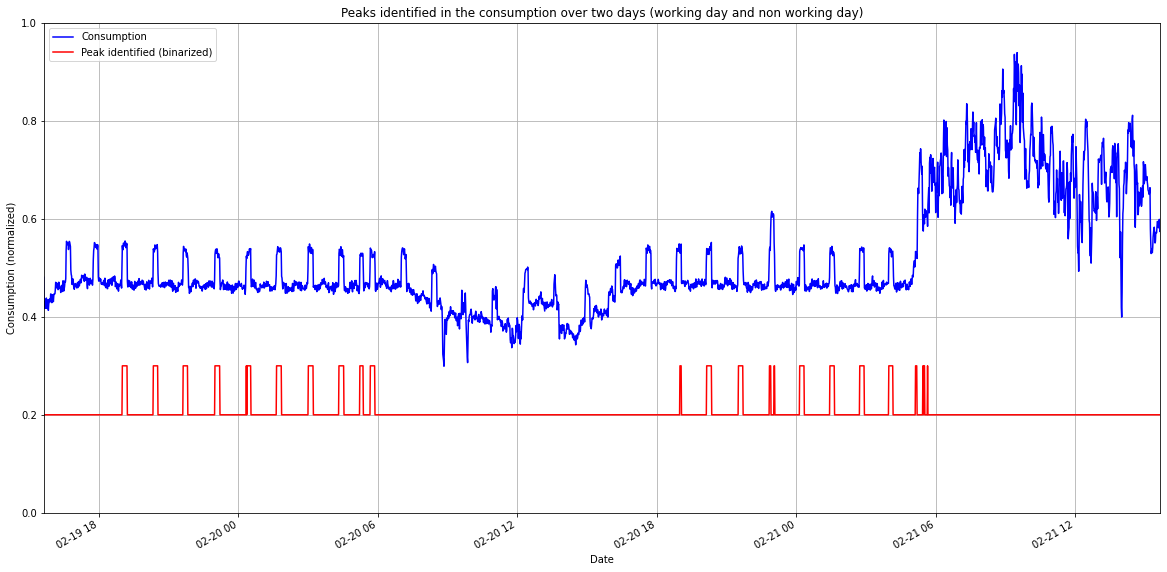

In [200]:
# plot the value with another color for the peak values
def plot_consommation_over_time_peak():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df["Date"], df["Normalized"], color="blue", label="Consumption")
    # plot the peak column
    ax.plot(
        df["Date"],
        0.1 * df["Peak"] + 0.2,
        color="red",
        label="Peak identified (binarized)",
    )
    # add to the right another scale for the peak column
    ax.set_title(
        "Peaks identified in the consumption over two days (working day and non working day)"
    )
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption (normalized)")
    ax.set_xlim(
        df["Date"].min() + pd.Timedelta(days=1), df["Date"].min() + pd.Timedelta(days=3)
    )
    ax.set_ylim(df["Normalized"].min(), df["Normalized"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()
    fig.savefig('../output/plot_consumption_over_time_peak.png')

plot_consommation_over_time_peak()

In [201]:
# drop columns working hour, transition morning and transition evening
df.drop(
    ["Working hour", "Transition morning", "Transition evening"], axis=1, inplace=True
)

## Generate Cycle for Dates

In [202]:
def generate_cycle(array, nb_div):
    re_part = np.ones(len(array))
    im_part = np.ones(len(array))

    for k in range(len(array)):
        z = np.exp(array[k] * 2j * np.pi / nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

In [203]:
def plot_cycle(re_part, im_part, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(re_part, im_part, "+")
    ax.set_title(title)
    ax.set_xlabel("Real Part")
    ax.set_ylabel("Imaginary Part")
    ax.grid(True)
    plt.show()

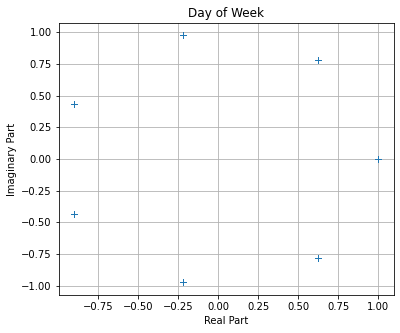

In [204]:
day_of_week_re, day_of_week_im = generate_cycle(df["Day_of_week"].to_numpy(), 7)
plot_cycle(day_of_week_re, day_of_week_im, "Day of Week")
fig.savefig('../output/plot_day_of_week_cycle.png')

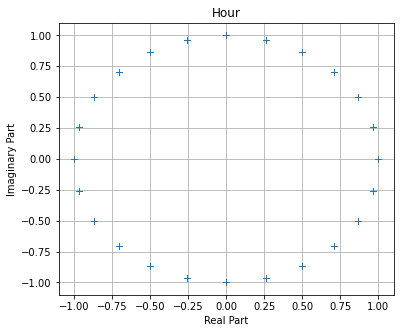

In [205]:
hour_re, hour_im = generate_cycle(df["Hour"].to_numpy(), 24)
plot_cycle(hour_re, hour_im, "Hour")
fig.savefig('../output/plot_hour_cycle.png')

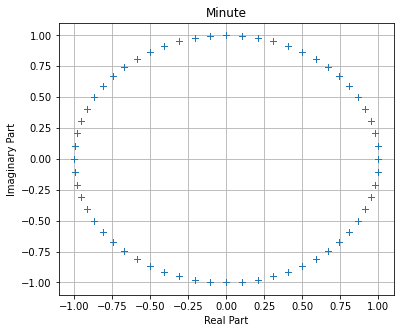

In [206]:
minute_re, minute_im = generate_cycle(df["Minute"].to_numpy(), 60)
plot_cycle(minute_re, minute_im, "Minute")
fig.savefig('../output/plot_minute_cycle.png')

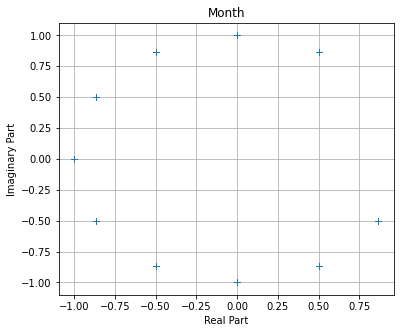

In [207]:
month_re, month_im = generate_cycle(df["Month"].to_numpy(), 12)
plot_cycle(month_re, month_im, "Month")
fig.savefig('../output/plot_month_cycle.png')

In [208]:
def generate_cycle_days(days, months, year):
    re_part = np.ones(len(days))
    im_part = np.ones(len(days))

    lst_31 = [1, 3, 5, 7, 8, 10, 12]  # Months with 31 days
    lst_30 = [4, 6, 9, 11]  # Months with 30 days

    for k in range(len(days)):
        if months[k] in lst_31:
            nb_div = 31
        elif months[k] in lst_30:
            nb_div = 30
        elif months[k] == 2:
            if year[k] % 4 == 0 and year[k] % 100 != 0 or year[k] % 400 == 0:
                nb_div = 29
            else:
                nb_div = 29
        else:
            print("Error in Months")
            break

        z = np.exp(days[k] * 2j * np.pi / nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

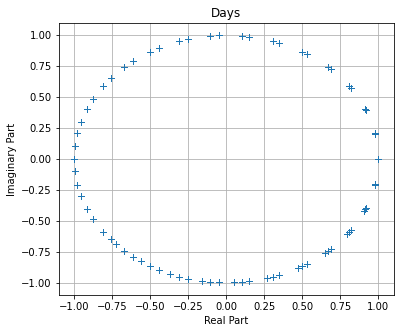

In [209]:
days_re, days_im = generate_cycle_days(
    df["Day"].to_numpy(), df["Month"].to_numpy(), df["Year"].to_numpy()
)
plot_cycle(days_re, days_im, "Days")
fig.savefig('../output/plot_days_cycle.png')

In [210]:
param = list(set(list(df.columns)) - set(["Second", "Year"]))
new_df = df[param]
new_df = new_df.assign(Day_of_Week_re=day_of_week_re.tolist())
new_df = new_df.assign(Day_of_Week_im=day_of_week_im.tolist())
new_df = new_df.assign(Hour_re=hour_re.tolist())
new_df = new_df.assign(Hour_im=hour_im.tolist())
new_df = new_df.assign(Minute_re=minute_re.tolist())
new_df = new_df.assign(Minute_im=minute_im.tolist())
new_df = new_df.assign(Month_re=month_re.tolist())
new_df = new_df.assign(Month_im=month_im.tolist())
new_df = new_df.assign(Day_re=days_re.tolist())
new_df = new_df.assign(Day_im=days_im.tolist())

In [211]:
# drop Hour of the day
new_df = new_df.drop(["Hour of the day"], axis=1)
new_df = new_df.drop(["Day_of_week"], axis=1)
new_df = new_df.drop(["Day of the week"], axis=1)

In [212]:
new_df.head()

,Date,Day,Type of hour,Hour,Normalized,Weekend,Value,Holiday,Winter,Irradiance,Peak,Month,Minute,Temperature,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
0,2022-02-18 15:39:00,18,2,15,0.514366,0,212141.645,0,1,134.0,0,2,39,12.8,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
1,2022-02-18 15:40:00,18,2,15,0.521853,0,216980.618,0,1,134.0,0,2,40,12.8,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
2,2022-02-18 15:41:00,18,2,15,0.526065,0,219702.692,0,1,134.0,0,2,41,12.8,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
3,2022-02-18 15:42:00,18,2,15,0.523435,0,218002.962,0,1,134.0,0,2,42,12.8,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
4,2022-02-18 15:43:00,18,2,15,0.525545,0,219366.764,0,1,134.0,0,2,43,12.8,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


## Windowing

In [213]:
# Add a column with the value at the exact same time the day before
new_df["Yesterday"] = new_df["Normalized"].shift(24 * 60)
# Add a column with the value at the exact same time one week before
new_df["Last_week"] = new_df["Normalized"].shift(24 * 60 * 7)
# Add a column with the value at the exact same time 12 hours before
new_df["12_hours_before"] = new_df["Normalized"].shift(12 * 60)
# Add a column with the value at the exact same time 6 hours before
new_df["6_hours_before"] = new_df["Normalized"].shift(6 * 60)

In [214]:
# drop the first 24*60*7 rows
new_df = new_df.drop(new_df.index[0 : 24 * 60 * 7])

In [215]:
# drop normalized column
new_df = new_df.drop(["Normalized"], axis=1)

## Normalization

In [216]:
new_df["Temperature"] = (new_df["Temperature"] - new_df["Temperature"].min()) / (
    new_df["Temperature"].max() - new_df["Temperature"].min()
)
new_df["Irradiance"] = (new_df["Irradiance"] - new_df["Irradiance"].min()) / (
    new_df["Irradiance"].max() - new_df["Irradiance"].min()
)
new_df["Hour"] = (new_df["Hour"] - new_df["Hour"].min()) / (
    new_df["Hour"].max() - new_df["Hour"].min()
)
new_df["Month"] = (new_df["Month"] - new_df["Month"].min()) / (
    new_df["Month"].max() - new_df["Month"].min()
)
new_df["Minute"] = (new_df["Minute"] - new_df["Minute"].min()) / (
    new_df["Minute"].max() - new_df["Minute"].min()
)
new_df["Day"] = (new_df["Day"] - new_df["Day"].min()) / (
    new_df["Day"].max() - new_df["Day"].min()
)
new_df["Type of hour"] = (new_df["Type of hour"] - new_df["Type of hour"].min()) / (
    new_df["Type of hour"].max() - new_df["Type of hour"].min()
)

# Modeling with ANN

## Preparing the data for the model

In [217]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from sklearn.metrics import r2_score

In [218]:
# crop new_df from the beginning to 2022-09-15 00:00:00 using column date
new_df = new_df[new_df["Date"] < "2022-09-15 00:00:00"]

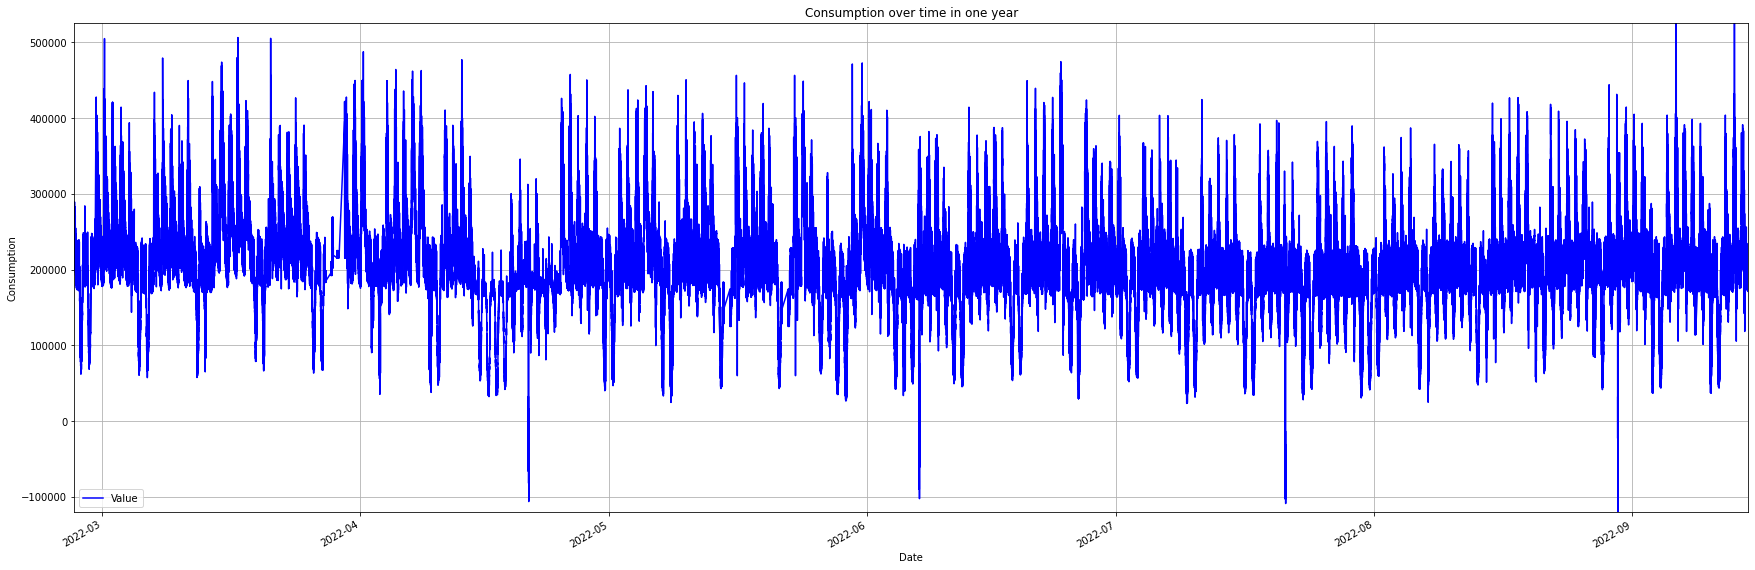

In [219]:
# plot value over time
def plot_consumption_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(new_df["Date"], new_df["Value"], color="blue", label="Value")
    ax.set_title("Consumption over time in one year")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")
    ax.set_xlim(new_df["Date"].min(), new_df["Date"].max())
    ax.set_ylim(new_df["Value"].min(), new_df["Value"].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consumption_over_time()


In [220]:
df_next_day = new_df

In [221]:
#drop 6_hours_before column and 12 hours before column from next day
df_next_day = df_next_day.drop(["6_hours_before"], axis=1)
df_next_day = df_next_day.drop(["12_hours_before"], axis=1)

In [222]:
target_column = ["Value"]
predictors = list(set(list(df_next_day.columns)) - set(target_column))

X = df_next_day[predictors]
y = df_next_day[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [223]:
# create new datafram X_train and X-test without column date
X_train_ = X_train.drop(["Date"], axis=1)
X_test_ = X_test.drop(["Date"], axis=1)

In [ ]:
X_train_.head()

,Day,Yesterday,Type of hour,Hour,Minute_im,Day_of_Week_re,Minute_re,Weekend,Winter,Holiday,Irradiance,Month_im,Peak,Month,Day_im,Minute,Day_of_Week_im,Month_re,Hour_re,Last_week,Day_re,Temperature,Hour_im
10080,0.8,0.656709,0.666667,0.652174,-0.866025,-0.900969,-0.500000,0,1,0,0.291373,0.866025,0,0.0,-0.762162,0.677966,-0.433884,0.5,-0.707107,0.514366,0.647386,0.244156,-0.707107
10081,0.8,0.661901,0.666667,0.652174,-0.913545,-0.900969,-0.406737,0,1,0,0.291373,0.866025,0,0.0,-0.762162,0.694915,-0.433884,0.5,-0.707107,0.521853,0.647386,0.244156,-0.707107
10082,0.8,0.639111,0.666667,0.652174,-0.951057,-0.900969,-0.309017,0,1,0,0.291373,0.866025,0,0.0,-0.762162,0.711864,-0.433884,0.5,-0.707107,0.526065,0.647386,0.244156,-0.707107
10083,0.8,0.639108,0.666667,0.652174,-0.978148,-0.900969,-0.207912,0,1,0,0.291373,0.866025,0,0.0,-0.762162,0.728814,-0.433884,0.5,-0.707107,0.523435,0.647386,0.244156,-0.707107
10084,0.8,0.647721,0.666667,0.652174,-0.994522,-0.900969,-0.104528,0,1,0,0.291373,0.866025,0,0.0,-0.762162,0.745763,-0.433884,0.5,-0.707107,0.525545,0.647386,0.244156,-0.707107


## Stochastic Gradient Descent

In [ ]:
# do gradient descent model
from sklearn.linear_model import SGDRegressor

# Create the model
sgd = SGDRegressor(max_iter=5500, learning_rate="adaptive", tol=1e-3, eta0=1e-4)

# Fit the model
sgd.fit(X_train_, y_train)

C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.0001, learning_rate='adaptive', max_iter=5500)

In [ ]:
sgdpredictions = sgd.predict(X_test_)
y_test_sgd = y_test
y_pred_sgd = sgdpredictions

# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_sgd["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_sgd.head()
# add a column with the value predicted Y_pred_ to y_test_
y_test_sgd["Value_pred"] = y_pred_sgd
y_test_sgd.head()

,Value,Date,Value_pred
222170,275735.874,2022-07-13 06:14:00,231204.190801
222171,302654.976,2022-07-13 06:15:00,232076.298432
222172,341823.360,2022-07-13 06:16:00,231427.454228
222173,347803.125,2022-07-13 06:17:00,232082.949542
222174,345774.519,2022-07-13 06:18:00,233650.324098


In [ ]:
# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_sgd.Value, y_test_sgd.Value_pred)
mse = mean_squared_error(y_test_sgd.Value, y_test_sgd.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_sgd.Value, y_test_sgd.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

MAE: 30962.39
MSE: 1654791796.62
RMSE: 40679.13
MAPE: 23.97 %


In [ ]:
r2 = r2_score(y_test_sgd.Value, y_test_sgd.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

Accuracy: 46.71 %


In [ ]:
# grid search for sgd tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    "max_iter": [5000, 5500, 5600],
    'eta0': [1e-5, 1e-4, 1e-3],
    'tol': [1e-3, 1e-4, 1e-5],
    "alpha": [0.0001, 0.00001, 0.000001]
}

In [ ]:
# Create a based model
sgd = SGDRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=sgd, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)

# Fit the grid search to the data
grid_search.fit(X_train_, y_train)

grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


## Ridge Regression

In [ ]:
# build a model using ridge regression
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=500, normalize=False)
ridge.fit(X_train_, y_train)

C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Ridge(alpha=550, normalize=False)

In [ ]:
ridge_pred = ridge.predict(X_test_)

In [ ]:
y_test_ridge = y_test
y_pred_ridge = ridge_pred

In [ ]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_ridge["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_ridge.head()
# add a column with the value predicted Y_pred_ to y_test_
y_test_ridge["Value_pred"] = y_pred_ridge
y_test_ridge.head()

,Value,Date,Value_pred
222170,275735.874,2022-07-13 06:14:00,229759.307116
222171,302654.976,2022-07-13 06:15:00,230468.449571
222172,341823.360,2022-07-13 06:16:00,229930.630673
222173,347803.125,2022-07-13 06:17:00,230462.599538
222174,345774.519,2022-07-13 06:18:00,231758.285267


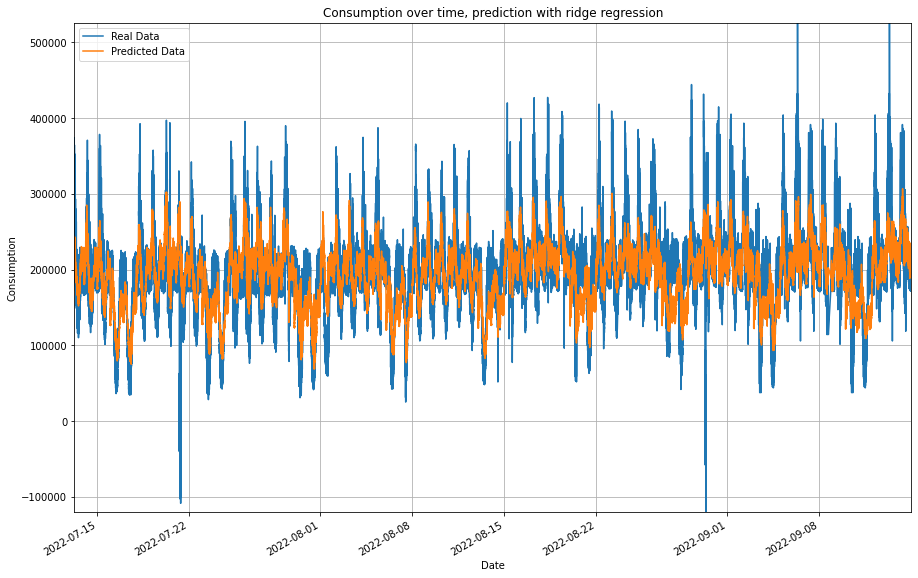

In [ ]:
# plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_ridge["Date"], y_test_ridge["Value"], label="Real Data")
ax.plot(y_test_ridge["Date"], y_test_ridge["Value_pred"], label="Predicted Data")
ax.set_title("Consumption over time, prediction with ridge regression")
ax.set_xlabel("Date")
ax.set_ylabel("Consumption")
ax.set_xlim(y_test_ridge["Date"].min(), y_test_ridge["Date"].max())
ax.set_ylim(y_test_ridge["Value"].min(), y_test_ridge["Value"].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()
fig.savefig("../output/plot_ridge_predictions_next_day.png")

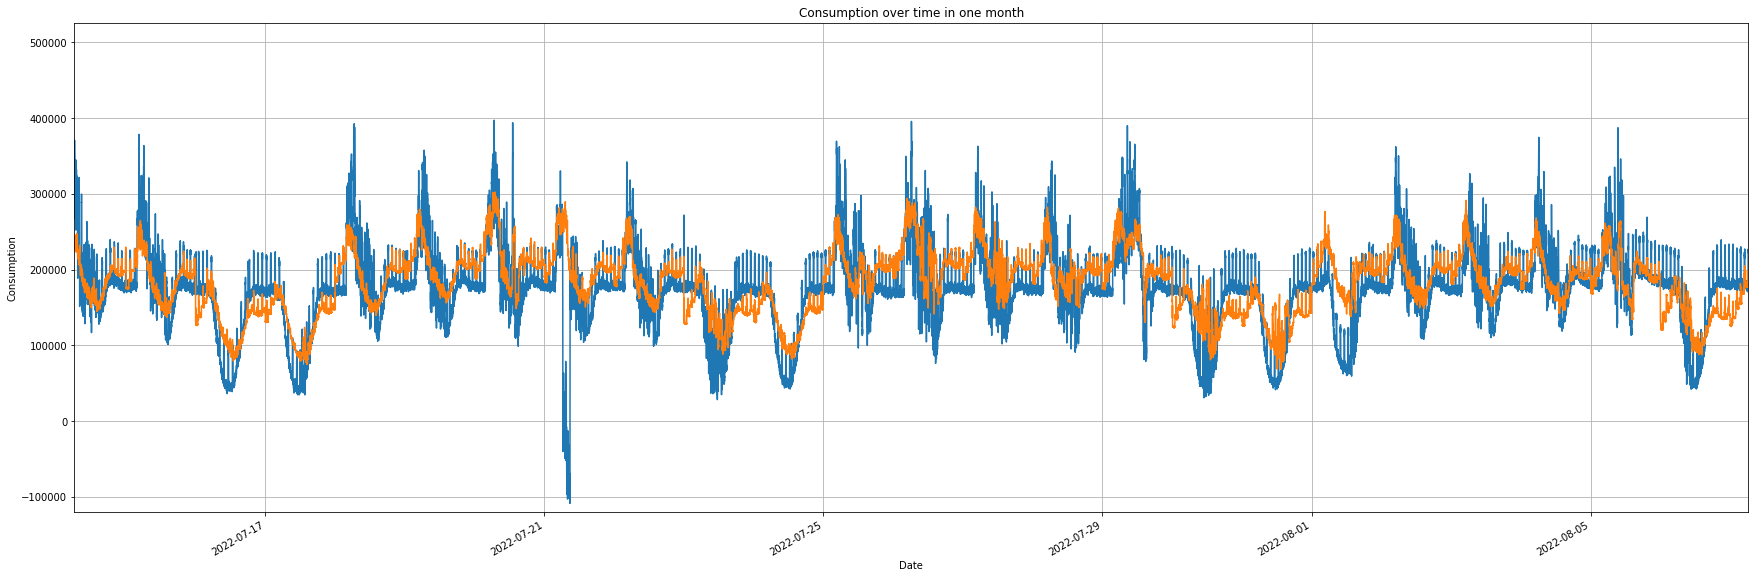

In [ ]:
def plot_consumption_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))

    ax.plot(y_test_ridge["Date"], y_test_ridge["Value"], label="Real")
    ax.plot(y_test_ridge["Date"], y_test_ridge["Value_pred"], label="Predicted")
    ax.set_title("Consumption over time in one month")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consumption")

    ax.set_xlim(
        y_test_ridge["Date"].min() + pd.Timedelta(days=1),
        y_test_ridge["Date"].min() + pd.Timedelta(days=25),
    )
    ax.set_ylim(y_test_ridge["Value"].min(), y_test_ridge["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()


plot_consumption_over_time_zoomed_graph()

In [ ]:
# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_ridge.Value, y_test_ridge.Value_pred)
mse = mean_squared_error(y_test_ridge.Value, y_test_ridge.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_ridge.Value, y_test_ridge.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

MAE: 30609.32
MSE: 1666542743.35
RMSE: 40823.31
MAPE: 23.44 %


In [ ]:
r2 = r2_score(y_test_ridge.Value, y_test_ridge.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")


Accuracy: 46.33 %


In [ ]:
# do a grid search for the best parameters of ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    "alpha": [450, 475, 500, 525, 550],
}

# Create a based model
ridge = Ridge()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=ridge, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)


In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [450, 475, 500, 525, 550]}, verbose=2)

In [ ]:
grid_search.best_params_


{'alpha': 500}

## Support Vector Machine

In [ ]:
# build a support vector machine model
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel="rbf", C=1e3, gamma=0.1)

In [ ]:
svr.fit(X_train_, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr_pred = svr.predict(X_test_)
y_test_svr = y_test
y_pred_svr = svr_pred

# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_svr["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_svr.head()

# add a column with the value predicted Y_pred_ to y_test_
y_test_svr["Value_pred"] = y_pred_svr
y_test_svr.head()

In [ ]:
# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_svr.Value, y_test_svr.Value_pred)
mse = mean_squared_error(y_test_svr.Value, y_test_svr.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_svr.Value, y_test_svr.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_svr.Value, y_test_svr.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")

## Hypertuning the final model

In [ ]:
# hypertune the parameters of the MLP regressor
from sklearn.metrics import make_scorer


In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    "hidden_layer_sizes": [
        (400, 400, 400),
        (300, 300, 300),
        (200, 200, 200),
        (100, 100, 100),
    ],
    "activation": ["relu", "tanh", "logistic"],
    "solver": ["adam", "sgd"],
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": [0.001, 0.0001]
}

In [ ]:
# Create a based model
mlp = MLPRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)


In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_, y_train)


In [ ]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))


In [ ]:
X_train_.head()


,Month_re,Minute_im,Winter,Peak,Weekend,Hour_im,Yesterday,Hour,12_hours_before,Minute_re,Day_of_Week_im,Day_re,Irradiance,Hour_re,Type of hour,Minute,Day,Holiday,Day_im,6_hours_before,Month,Temperature,Month_im,Last_week,Day_of_Week_re
10080,0.5,-0.866025,1,0,0,-0.707107,0.656709,0.652174,0.470097,-0.500000,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.677966,0.8,0,-0.762162,0.614126,0.0,0.244156,0.866025,0.514366,-0.900969
10081,0.5,-0.913545,1,0,0,-0.707107,0.661901,0.652174,0.475095,-0.406737,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.694915,0.8,0,-0.762162,0.589400,0.0,0.244156,0.866025,0.521853,-0.900969
10082,0.5,-0.951057,1,0,0,-0.707107,0.639111,0.652174,0.471747,-0.309017,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.711864,0.8,0,-0.762162,0.577067,0.0,0.244156,0.866025,0.526065,-0.900969
10083,0.5,-0.978148,1,0,0,-0.707107,0.639108,0.652174,0.464088,-0.207912,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.728814,0.8,0,-0.762162,0.619993,0.0,0.244156,0.866025,0.523435,-0.900969
10084,0.5,-0.994522,1,0,0,-0.707107,0.647721,0.652174,0.467889,-0.104528,-0.433884,0.647386,0.291373,-0.707107,0.666667,0.745763,0.8,0,-0.762162,0.667354,0.0,0.244156,0.866025,0.525545,-0.900969


## Find best number of epochs

In [224]:
mae_test = []
mae_train = []
mse_test = []
mse_train = []
rmse_test = []
rmse_train = []
mape_test = []
mape_train = []
r2_test = []
r2_train = []

for n in range(1, 21, 1):
    print(n)
    X = new_df[predictors]
    y = new_df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=False
    )
    X_train_ = X_train.drop(["Date"], axis=1)
    X_test_ = X_test.drop(["Date"], axis=1)
    reg_all = MLPRegressor(
        hidden_layer_sizes=(300, 300, 300, 300, 300),
        activation="relu",
        solver="adam",
        alpha=0.0005,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.0001,
        power_t=0.5,
        max_iter=n,
        shuffle=True,
        random_state=None,
        tol=0.0001,
        verbose=True,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08,
    )
    reg_all.fit(X_train_, y_train)
    y_pred = reg_all.predict(X_test_)
    y_test_ = y_test
    y_pred_ = y_pred
    y_test_["Date"] = X_test["Date"]
    y_test_["Value_pred"] = y_pred_
    mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
    mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
    mape = mape * 100
    print("MAPE_test:", round(mape, 2), "%")
    r2 = r2_score(y_test_.Value, y_test_.Value_pred)
    accuracy = r2 * 100
    print("Accuracy_test:", round(accuracy, 2), "%")
    mae_test.append(mae)
    mse_test.append(mse)
    rmse_test.append(rmse)
    mape_test.append(mape)
    r2_test.append(accuracy)

    y_pred = reg_all.predict(X_train_)
    y_test_ = y_train
    y_pred_ = y_pred
    y_test_["Date"] = X_test["Date"]
    y_test_["Value_pred"] = y_pred_
    mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
    mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
    mape = mape * 100
    print("MAPE_train:", round(mape, 2), "%")
    r2 = r2_score(y_test_.Value, y_test_.Value_pred)
    accuracy = r2 * 100
    print("Accuracy_train:", round(accuracy, 2), "%")
    mae_train.append(mae)
    mse_train.append(mse)
    rmse_train.append(rmse)
    mape_train.append(mape)
    r2_train.append(accuracy)


1


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6022632134.26729012


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 28.52 %
Accuracy_test: 0.87 %
MAPE_train: 25.95 %
Accuracy_train: 36.33 %
2


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6045410402.70044708
Iteration 2, loss = 1018142780.37008405


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 22.65 %
Accuracy_test: 36.18 %
MAPE_train: 18.95 %
Accuracy_train: 62.02 %
3


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5932846322.86548424
Iteration 2, loss = 1029817281.38785982
Iteration 3, loss = 663777552.63784945


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.64 %
Accuracy_test: 57.05 %
MAPE_train: 15.48 %
Accuracy_train: 70.95 %
4


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6011653981.07745743
Iteration 2, loss = 1035553146.92670035
Iteration 3, loss = 663132661.54862857
Iteration 4, loss = 558965091.14249468


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.04 %
Accuracy_test: 59.65 %
MAPE_train: 14.13 %
Accuracy_train: 73.68 %
5


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5789384427.12065125
Iteration 2, loss = 976353057.31253755
Iteration 3, loss = 638078464.11686242
Iteration 4, loss = 547888236.77489519
Iteration 5, loss = 510304637.72036231


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.08 %
Accuracy_test: 61.71 %
MAPE_train: 13.36 %
Accuracy_train: 75.57 %
6


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5908402470.58136845
Iteration 2, loss = 1001246369.41115355
Iteration 3, loss = 646891654.24027395
Iteration 4, loss = 551881677.34732842
Iteration 5, loss = 512464699.80241328
Iteration 6, loss = 488739724.38587350


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 18.99 %
Accuracy_test: 60.79 %
MAPE_train: 13.08 %
Accuracy_train: 76.45 %
7


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5961860929.55443001
Iteration 2, loss = 1007992550.80366623
Iteration 3, loss = 650507168.34049606
Iteration 4, loss = 551375345.70467722
Iteration 5, loss = 513568997.59773964
Iteration 6, loss = 492202113.23176026
Iteration 7, loss = 477604087.82826215


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 19.06 %
Accuracy_test: 61.03 %
MAPE_train: 12.75 %
Accuracy_train: 76.74 %
8


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5975376203.36173916
Iteration 2, loss = 1007933728.48556185
Iteration 3, loss = 646814288.64659679
Iteration 4, loss = 547756994.13101506
Iteration 5, loss = 511002628.19636565
Iteration 6, loss = 489437662.67840707
Iteration 7, loss = 473345845.19018954
Iteration 8, loss = 460048166.31575775


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 20.17 %
Accuracy_test: 57.89 %
MAPE_train: 12.77 %
Accuracy_train: 77.65 %
9


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5943772787.01523876
Iteration 2, loss = 1016552441.01722085
Iteration 3, loss = 650416244.53865111
Iteration 4, loss = 551181843.10751975
Iteration 5, loss = 512750959.55038369
Iteration 6, loss = 491240585.79328644
Iteration 7, loss = 475628309.92312825
Iteration 8, loss = 463116827.23974574
Iteration 9, loss = 451793730.62318981


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 21.97 %
Accuracy_test: 54.52 %
MAPE_train: 12.98 %
Accuracy_train: 77.78 %
10


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5771768889.59762859
Iteration 2, loss = 1001731047.21094763
Iteration 3, loss = 643003130.98938847
Iteration 4, loss = 546791782.58735430
Iteration 5, loss = 509252202.57026118
Iteration 6, loss = 488249387.44575256
Iteration 7, loss = 473511086.54862630
Iteration 8, loss = 462139676.97279769
Iteration 9, loss = 451966230.97246438
Iteration 10, loss = 443111757.35019898


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 23.07 %
Accuracy_test: 50.24 %
MAPE_train: 12.24 %
Accuracy_train: 78.49 %
11


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5966332059.14171600
Iteration 2, loss = 1003931721.41207743
Iteration 3, loss = 641731174.24105036
Iteration 4, loss = 548311269.37873733
Iteration 5, loss = 511078141.85416085
Iteration 6, loss = 488945579.12037814
Iteration 7, loss = 472777149.96152097
Iteration 8, loss = 459900764.07312864
Iteration 9, loss = 448178016.43003887
Iteration 10, loss = 437417837.38481879
Iteration 11, loss = 427798119.73795336


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 20.13 %
Accuracy_test: 58.26 %
MAPE_train: 11.79 %
Accuracy_train: 79.16 %
12


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5864360704.74799061
Iteration 2, loss = 971245466.36414552
Iteration 3, loss = 633881204.19043767
Iteration 4, loss = 544179323.63366103
Iteration 5, loss = 507829854.73726875
Iteration 6, loss = 487067318.39923912
Iteration 7, loss = 471877323.68135756
Iteration 8, loss = 459556854.44354850
Iteration 9, loss = 448835026.08498919
Iteration 10, loss = 439603003.10174358
Iteration 11, loss = 429948142.70471853
Iteration 12, loss = 420912123.05729192


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 22.0 %
Accuracy_test: 53.25 %
MAPE_train: 11.67 %
Accuracy_train: 79.58 %
13


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6017630206.74246311
Iteration 2, loss = 1020226324.43839490
Iteration 3, loss = 660219978.14717495
Iteration 4, loss = 557498339.00083029
Iteration 5, loss = 516547929.40682596
Iteration 6, loss = 493092574.57794040
Iteration 7, loss = 476308177.88571644
Iteration 8, loss = 463590665.48396611
Iteration 9, loss = 451707369.74489266
Iteration 10, loss = 441001040.22203094
Iteration 11, loss = 430939211.28569198
Iteration 12, loss = 421745806.89123350
Iteration 13, loss = 412525752.68092138


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (13) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 22.72 %
Accuracy_test: 50.06 %
MAPE_train: 11.74 %
Accuracy_train: 79.96 %
14


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5929110201.52914238
Iteration 2, loss = 982745359.92215645
Iteration 3, loss = 630520709.85749507
Iteration 4, loss = 541531739.75008500
Iteration 5, loss = 506812897.52130198
Iteration 6, loss = 485907036.17602134
Iteration 7, loss = 469682663.00885987
Iteration 8, loss = 455758960.35187644
Iteration 9, loss = 443497251.46237630
Iteration 10, loss = 432108092.70124692
Iteration 11, loss = 421503997.35376734
Iteration 12, loss = 411995253.66370112
Iteration 13, loss = 403058982.63930529
Iteration 14, loss = 395527932.40234882


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 23.21 %
Accuracy_test: 47.28 %
MAPE_train: 11.39 %
Accuracy_train: 80.78 %
15


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5923928272.33027840
Iteration 2, loss = 1007201463.14802516
Iteration 3, loss = 648921346.00056458
Iteration 4, loss = 551017456.00024629
Iteration 5, loss = 512053036.59141749
Iteration 6, loss = 490191234.75131667
Iteration 7, loss = 474077606.32629925
Iteration 8, loss = 460429697.40198523
Iteration 9, loss = 448132124.97851002
Iteration 10, loss = 436580984.86963725
Iteration 11, loss = 425571869.76195955
Iteration 12, loss = 415372059.52569050
Iteration 13, loss = 405901345.82966948
Iteration 14, loss = 397283596.55071801
Iteration 15, loss = 389194016.45038933


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 24.68 %
Accuracy_test: 42.67 %
MAPE_train: 11.25 %
Accuracy_train: 81.08 %
16


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5886889566.74075413
Iteration 2, loss = 1025472553.30961704
Iteration 3, loss = 657969339.82439613
Iteration 4, loss = 552687017.28707516
Iteration 5, loss = 513732227.66527963
Iteration 6, loss = 492004120.73158306
Iteration 7, loss = 475515900.88064641
Iteration 8, loss = 461827493.29322600
Iteration 9, loss = 449690836.97645640
Iteration 10, loss = 439171496.33773619
Iteration 11, loss = 428944524.86076683
Iteration 12, loss = 419652517.62170112
Iteration 13, loss = 410459166.77744430
Iteration 14, loss = 402482718.50126106
Iteration 15, loss = 394075373.83942032
Iteration 16, loss = 387175943.81565094


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 22.13 %
Accuracy_test: 51.81 %
MAPE_train: 11.12 %
Accuracy_train: 81.22 %
17


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5915399206.82113361
Iteration 2, loss = 1006983236.74902117
Iteration 3, loss = 649223424.57561743
Iteration 4, loss = 549841394.07107115
Iteration 5, loss = 510620095.74076539
Iteration 6, loss = 488539686.99044615
Iteration 7, loss = 473392641.17740411
Iteration 8, loss = 460898685.68724453
Iteration 9, loss = 450096681.40715611
Iteration 10, loss = 440318120.82230234
Iteration 11, loss = 430760380.53954583
Iteration 12, loss = 421604787.68425196
Iteration 13, loss = 413145794.84991503
Iteration 14, loss = 404557786.22228187
Iteration 15, loss = 396714927.92452568
Iteration 16, loss = 389136565.27561486
Iteration 17, loss = 382222225.32933670


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 24.74 %
Accuracy_test: 38.88 %
MAPE_train: 11.07 %
Accuracy_train: 81.39 %
18


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5890834372.44806480
Iteration 2, loss = 995773408.80218792
Iteration 3, loss = 645166341.25846183
Iteration 4, loss = 548525222.49664402
Iteration 5, loss = 510363742.71439558
Iteration 6, loss = 488996939.76439637
Iteration 7, loss = 473895825.23025894
Iteration 8, loss = 461178123.86079866
Iteration 9, loss = 449848064.95812076
Iteration 10, loss = 438854108.33312857
Iteration 11, loss = 429232344.06066710
Iteration 12, loss = 419584601.33986425
Iteration 13, loss = 410847669.86059093
Iteration 14, loss = 402715725.45958024
Iteration 15, loss = 395050247.19306087
Iteration 16, loss = 388112607.29420668
Iteration 17, loss = 381455987.56312495
Iteration 18, loss = 375168515.15110952


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 23.44 %
Accuracy_test: 45.42 %
MAPE_train: 11.03 %
Accuracy_train: 81.78 %
19


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5920842128.15324402
Iteration 2, loss = 995385015.02776134
Iteration 3, loss = 643162166.28773081
Iteration 4, loss = 547648987.71871090
Iteration 5, loss = 512497070.32200378
Iteration 6, loss = 492401248.57450640
Iteration 7, loss = 477964454.33936727
Iteration 8, loss = 465690126.53954256
Iteration 9, loss = 455768940.03467482
Iteration 10, loss = 446269603.92853206
Iteration 11, loss = 437736238.19834512
Iteration 12, loss = 429578389.99407130
Iteration 13, loss = 421307137.13121957
Iteration 14, loss = 413209700.41321236
Iteration 15, loss = 405236429.55892491
Iteration 16, loss = 397185831.23385048
Iteration 17, loss = 389791906.15147984
Iteration 18, loss = 382544881.07864171
Iteration 19, loss = 375631868.93351793


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (19) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 24.58 %
Accuracy_test: 39.59 %
MAPE_train: 11.35 %
Accuracy_train: 81.61 %
20


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 5881207903.98274231
Iteration 2, loss = 1023822509.11976612
Iteration 3, loss = 651017111.36633468
Iteration 4, loss = 550297784.61471343
Iteration 5, loss = 510889481.89200300
Iteration 6, loss = 489315773.05203730
Iteration 7, loss = 473337937.25453699
Iteration 8, loss = 460877065.84084481
Iteration 9, loss = 449396011.10174817
Iteration 10, loss = 439344864.60565990
Iteration 11, loss = 429697547.70519656
Iteration 12, loss = 421024180.33779711
Iteration 13, loss = 412514985.91755444
Iteration 14, loss = 404862820.50448591
Iteration 15, loss = 397305945.72847003
Iteration 16, loss = 389665114.76781845
Iteration 17, loss = 382788584.20495611
Iteration 18, loss = 376529980.92713284
Iteration 19, loss = 370244966.40531343
Iteration 20, loss = 364347633.67669147


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE_test: 25.02 %
Accuracy_test: 38.05 %
MAPE_train: 10.92 %
Accuracy_train: 82.32 %


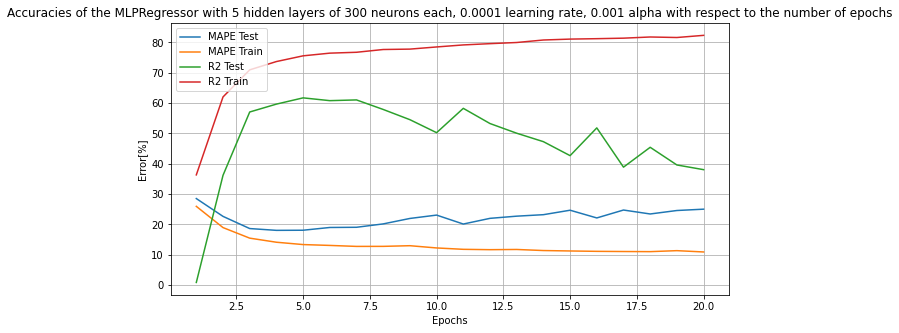

In [225]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21, 1), mape_test, label="MAPE Test")
plt.plot(range(1, 21, 1), mape_train, label="MAPE Train")
plt.plot(range(1, 21, 1), r2_test, label="R2 Test")
plt.plot(range(1, 21, 1), r2_train, label="R2 Train")
plt.xlabel("Epochs")
plt.ylabel("Error[%]")
plt.title(
    "Accuracies of the MLPRegressor with 5 hidden layers of 300 neurons each, 0.0001 learning rate, 0.001 alpha with respect to the number of epochs"
)
plt.grid(True)
plt.legend()
plt.show()


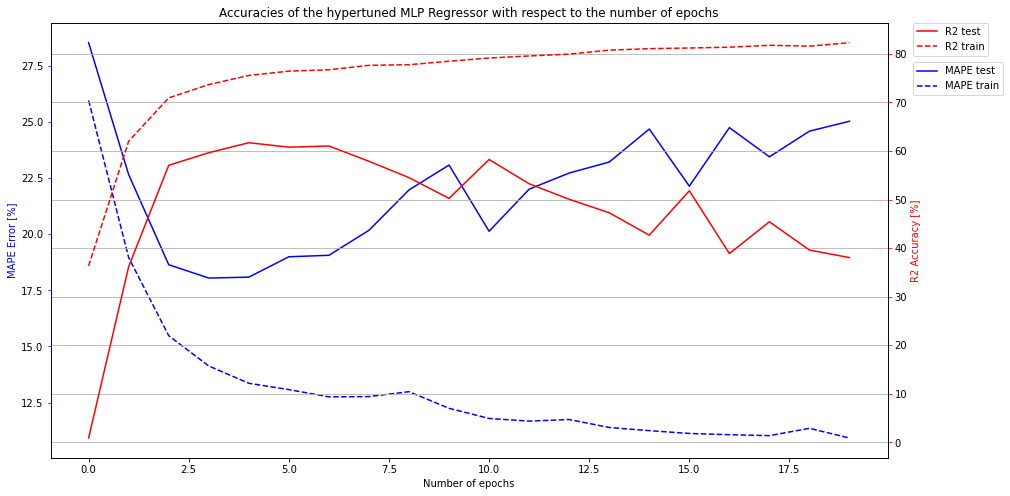

In [226]:
# Increase the default figure size
plt.rcParams["figure.figsize"] = [15, 8]

# Create a figure and an axis for the first y-axis
fig, ax1 = plt.subplots()

# Plot the mape_test and mape_train data on the first y-axis
ax1.plot(mape_test, "b-", label="MAPE test")
ax1.plot(mape_train, "b--", label="MAPE train")

# Set the label and color for the first y-axis
ax1.set_ylabel("MAPE Error [%]", color="b")
ax1.tick_params(axis="y", color="b")

# put lgend outside the plot
plt.legend(bbox_to_anchor=(1.03, 0.91), loc=2, borderaxespad=0.0)


# Create a second axis for the second y-axis
ax2 = ax1.twinx()

# Plot the r2_test and r2_train data on the second y-axis
ax2.plot(r2_test, "r-", label="R2 test")
ax2.plot(r2_train, "r--", label="R2 train")

# Set the label and color for the second y-axis
ax2.set_ylabel("R2 Accuracy [%]", color="r")
ax2.tick_params(axis="y", color="r")

# put lgend outside the plot
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.0)

# Label the x-axis and add a title
plt.xlabel("Number of epochs")
plt.title(
    "Accuracies of the hypertuned MLP Regressor with respect to the number of epochs"
)
plt.grid(True)
ax1.set_xlabel("Number of epochs")

# Show the plot
plt.show()
fig.savefig("../output/plot_MLP_accuracies_epochs_next_day.png")


## Final model

In [118]:
reg_all = MLPRegressor(
    hidden_layer_sizes=(300, 300, 300, 300, 300),
    activation="relu",
    solver="adam",
    alpha=0.0005,
    batch_size="auto",
    learning_rate="constant",
    learning_rate_init=0.0001,
    power_t=0.5,
    max_iter=6,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=True,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
)
reg_all.fit(X_train_, y_train)


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6042328704.20723152
Iteration 2, loss = 1036767057.13460755
Iteration 3, loss = 664761281.76409149
Iteration 4, loss = 555855509.62692058
Iteration 5, loss = 513667375.95587212
Iteration 6, loss = 490364843.69629771


C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.0005, hidden_layer_sizes=(300, 300, 300, 300, 300),
             learning_rate_init=0.0001, max_iter=6, verbose=True)

In [119]:
y_pred = reg_all.predict(X_test_)

In [120]:
import joblib

joblib.dump(
    reg_all,
    "../output/energy_forecasting_nextday.joblib",
)


['energy_forecasting_nextday.joblib']

In [121]:
y_test_ = y_test
y_pred_ = y_pred


In [122]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_["Date"] = X_test["Date"]
# y_test_ = y_test_.sort_values(by=['Date'])
y_test_.head()
# add a column with the value predicted Y_pred_ to y_test_
y_test_["Value_pred"] = y_pred_
y_test_.head()


,Value,Date,Value_pred
222170,275735.874,2022-07-13 06:14:00,245007.772893
222171,302654.976,2022-07-13 06:15:00,245525.452717
222172,341823.360,2022-07-13 06:16:00,245127.572851
222173,347803.125,2022-07-13 06:17:00,245730.528744
222174,345774.519,2022-07-13 06:18:00,247300.329094


In [123]:
#save y_test to csv
y_test_.to_csv("../output/forecasting_nextday.csv", index=False)

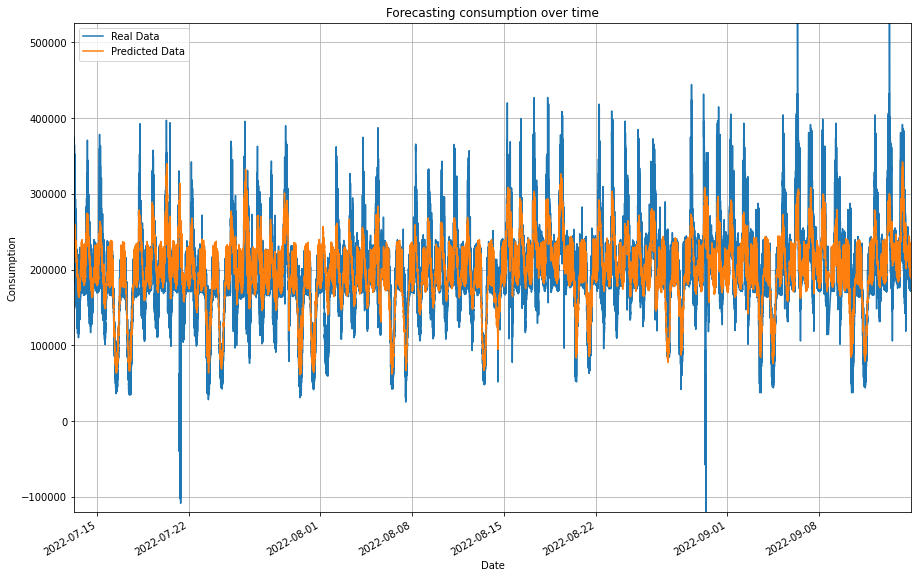

In [125]:
# plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_["Date"], y_test_["Value"], label="Real Data")
ax.plot(y_test_["Date"], y_test_["Value_pred"], label="Predicted Data")
ax.set_title("Forecasting consumption over time")
ax.set_xlabel("Date")
ax.set_ylabel("Consumption")
ax.set_xlim(y_test_["Date"].min(), y_test_["Date"].max())
ax.set_ylim(y_test_["Value"].min(), y_test_["Value"].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()
fig.savefig("../output/plot_forecasting_nextday.png")


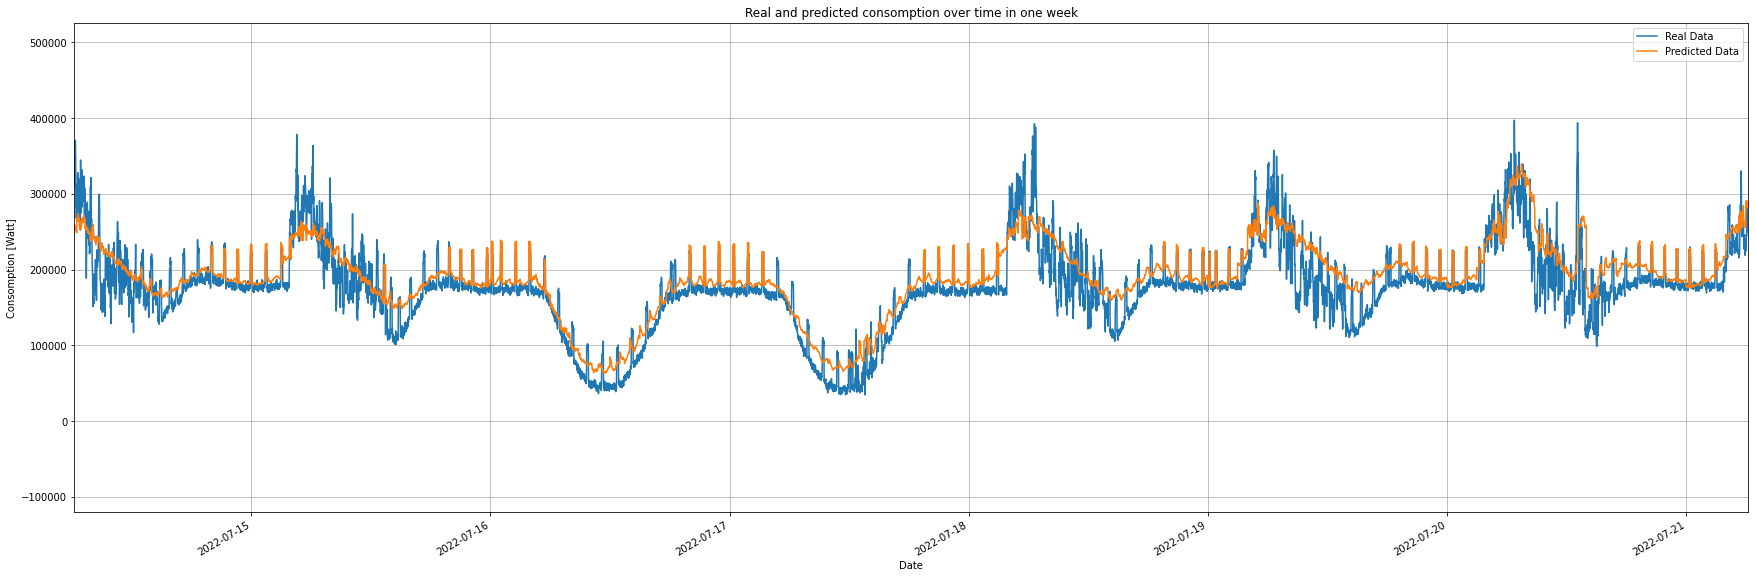

In [126]:
def plot_consumption_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))

    ax.plot(y_test_["Date"], y_test_["Value"], label="Real Data")
    ax.plot(y_test_["Date"], y_test_["Value_pred"], label="Predicted Data")
    ax.set_title("Real and predicted consomption over time in one week")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consomption [Watt]")

    ax.set_xlim(
        y_test_["Date"].min() + pd.Timedelta(days=1),
        y_test_["Date"].min() + pd.Timedelta(days=8),
    )
    ax.set_ylim(y_test_["Value"].min(), y_test_["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
    fig.savefig("../output/plot_forecasting_week_nextday.png")


plot_consumption_over_time_zoomed_graph()


In [127]:
# Compute the MAE, MSE, MAPE and RMSE
mae = mean_absolute_error(y_test_.Value, y_test_.Value_pred)
mse = mean_squared_error(y_test_.Value, y_test_.Value_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_.Value, y_test_.Value_pred)
mape = mape * 100

# Print the results
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAPE:", round(mape, 2), "%")


MAE: 22602.06
MSE: 1213298207.29
RMSE: 34832.43
MAPE: 18.81 %


In [128]:
r2 = r2_score(y_test_.Value, y_test_.Value_pred)

accuracy = r2 * 100

# Print the result
print("Accuracy:", round(accuracy, 2), "%")


Accuracy: 60.92 %


### Comparing the models

<div class="alert alert-warning">
  <strong>Warning:</strong> Do not run the cells below: 
The last two plots are obtained by running the notebook twice, once per model (intraday and nextday) to compare their results, this execution is very long so it is easier to look at these plots below or in the output folder without running the cells again.
</div>

In [129]:
# y_test_6hrs = y_test_
# y_test_24hrs = y_test_

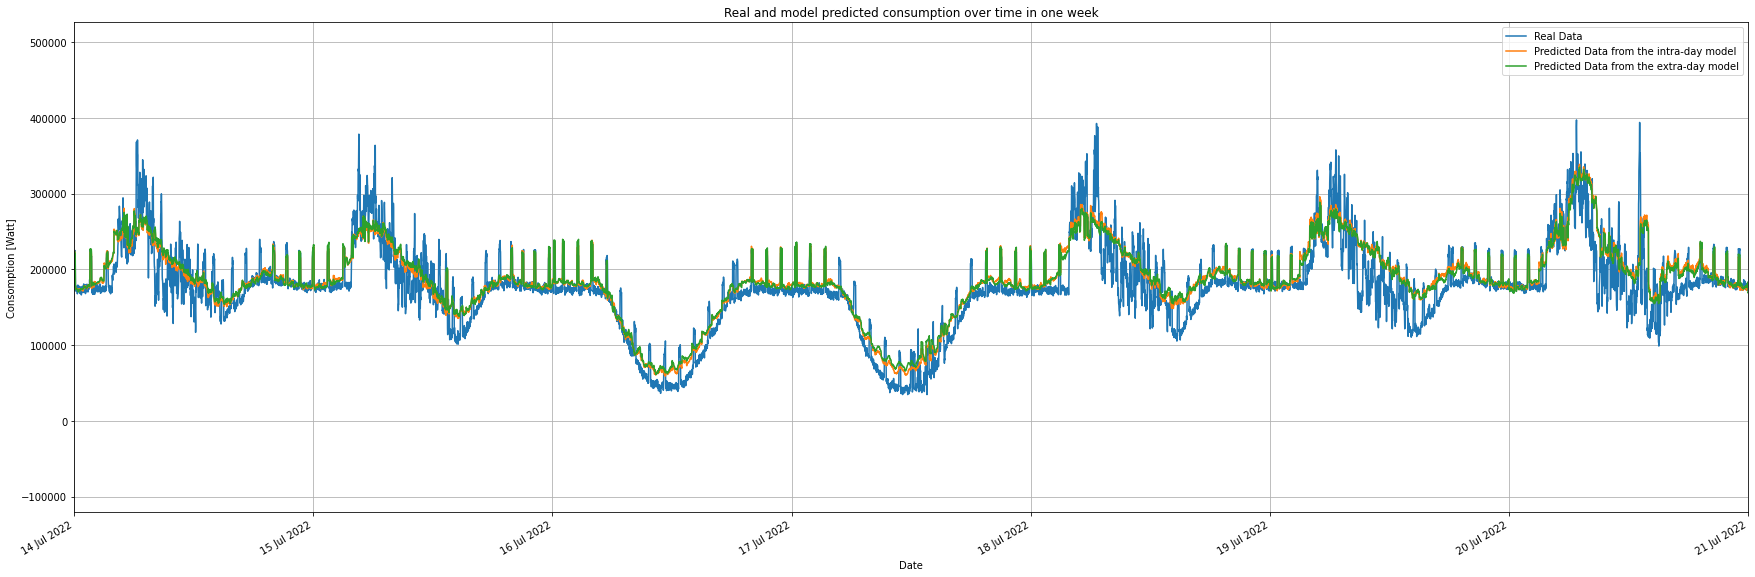

In [444]:
def plot_consumption_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))

    ax.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    ax.plot(
        y_test_6hrs["Date"],
        y_test_6hrs["Value_pred"],
        label="Predicted Data from the intra-day model",
    )
    ax.plot(
        y_test_24hrs["Date"],
        y_test_24hrs["Value_pred"],
        label="Predicted Data from the extra-day model",
    )
    ax.set_title("Real and model predicted consumption over time in one week")
    ax.set_xlabel("Date")
    ax.set_ylabel("Consomption [Watt]")

    ax.set_xlim(
        y_test_6hrs["Date"].min() + pd.Timedelta(hours=17) + pd.Timedelta(minutes=46),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=7),
    )
    ax.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax.grid(True)
    fig.autofmt_xdate()
    formatter = mdates.DateFormatter("%d %b %Y")
    ax.xaxis.set_major_formatter(formatter)
    ax.legend()
    plt.show()
    fig.savefig("../output/plot_forecasting_week_intraday_vs_extraday.png")


plot_consumption_over_time_zoomed_graph()


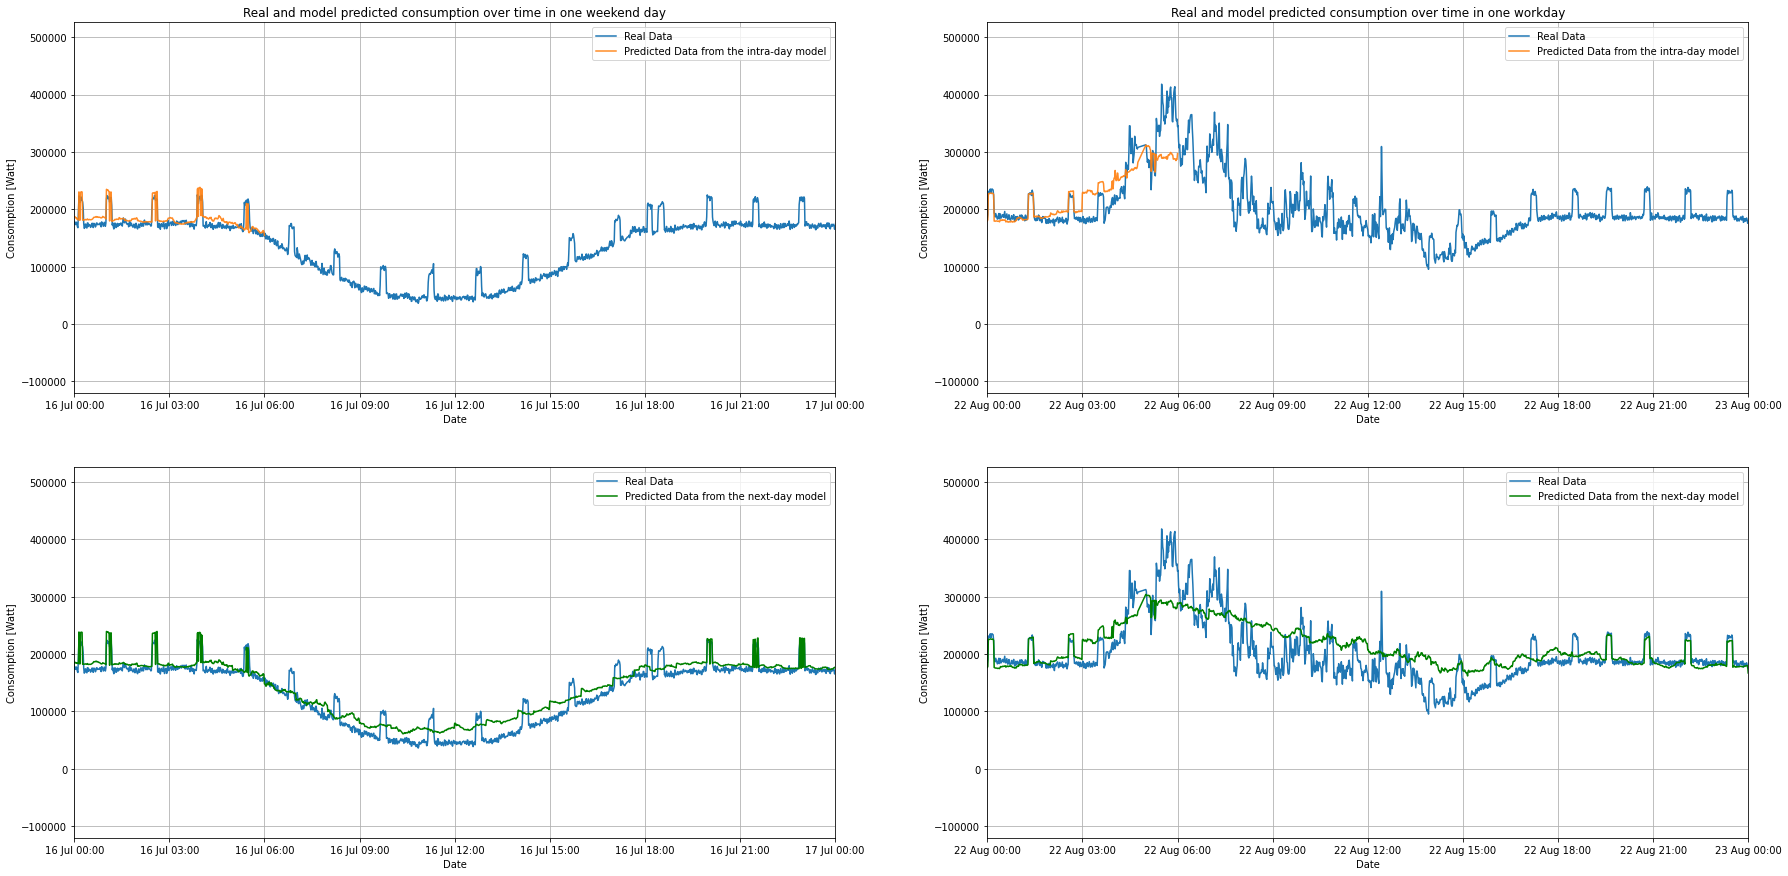

In [555]:
import matplotlib.dates as mdates


def plot_consumption_over_time_zoomed_graph():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 15))
    ax1.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    y_6hrs = y_test_6hrs.loc[
        (
            y_test_6hrs["Date"]
            >= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=17)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=2)
        )
        & (
            y_test_6hrs["Date"]
            <= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=23)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=2)
        )
    ]
    ax1.plot(
        y_6hrs["Date"],
        y_6hrs["Value_pred"],
        label="Predicted Data from the intra-day model",
        alpha=0.9,
    )
    ax1.set_title("Real and model predicted consumption over time in one weekend day")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Consomption [Watt]")
    ax1.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=2),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=3),
    )
    ax1.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax1.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax1.xaxis.set_major_formatter(formatter)
    ax1.legend()

    ax2.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    y_6hrs = y_test_6hrs.loc[
        (
            y_test_6hrs["Date"]
            >= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=17)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=39)
        )
        & (
            y_test_6hrs["Date"]
            <= y_test_6hrs["Date"].min()
            + pd.Timedelta(hours=23)
            + pd.Timedelta(minutes=46)
            + pd.Timedelta(days=39)
        )
    ]
    ax2.plot(
        y_6hrs["Date"],
        y_6hrs["Value_pred"],
        label="Predicted Data from the intra-day model",
        alpha=0.9,
    )
    ax2.set_title("Real and model predicted consumption over time in one workday")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Consomption [Watt]")
    ax2.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=39),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=40),
    )
    ax2.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax2.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax2.xaxis.set_major_formatter(formatter)
    ax2.legend()

    ax3.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    ax3.plot(
        y_test_24hrs["Date"],
        y_test_24hrs["Value_pred"],
        label="Predicted Data from the next-day model",
        color="g",
    )
    ax3.set_xlabel("Date")
    ax3.set_ylabel("Consomption [Watt]")
    ax3.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=2),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=3),
    )
    ax3.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax3.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax3.xaxis.set_major_formatter(formatter)
    ax3.legend()

    ax4.plot(y_test_6hrs["Date"], y_test_6hrs["Value"], label="Real Data")
    ax4.plot(
        y_test_24hrs["Date"],
        y_test_24hrs["Value_pred"],
        label="Predicted Data from the next-day model",
        color="g",
    )
    ax4.set_xlabel("Date")
    ax4.set_ylabel("Consomption [Watt]")
    ax4.set_xlim(
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=39),
        y_test_6hrs["Date"].min()
        + pd.Timedelta(hours=17)
        + pd.Timedelta(minutes=46)
        + pd.Timedelta(days=40),
    )
    ax4.set_ylim(y_test_6hrs["Value"].min(), y_test_6hrs["Value"].max())
    ax4.grid(True)
    formatter = mdates.DateFormatter("%d %b %H:%M")
    ax4.xaxis.set_major_formatter(formatter)
    ax4.legend()

    plt.show()
    fig.savefig("../output/plot_forecasting_day_intraday_vs_extraday.png")

plot_consumption_over_time_zoomed_graph()
